# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from pandas import DataFrame



In [2]:
data = pd.read_csv('Customer data.csv')
data

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [3]:
def reading_data(path):
    data = pd.read_csv('Customer data.csv')  # reading csv file
    first_row = []
    # appending first row in a list
    for i in range(0, 7):
        first_row.append(float(data.columns[i]))

    data.loc[-1] = first_row  # adding a row
    data.index = data.index + 1  # shifting index
    data = data.sort_index()  # sorting indexes

    data.columns = ["ID", "Sex", "Marital status", "Age", "Education","Income","Occupation", "Settlement size"]  # assigning column names
    return data

In [4]:
data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [5]:
def scatter_plot(plotted_df):
    fig, ax = plt.subplots()
    # selecting x and y axises without labels
    ax.scatter(plotted_df['x'], plotted_df['y'], c='y', s=0.5)
    plt.xlabel('x')  # entering name for x axis
    plt.ylabel('y')  # entering name for y axis
    plt.title("Dataset")  # entering a title for plot
    plt.show()

In [6]:
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

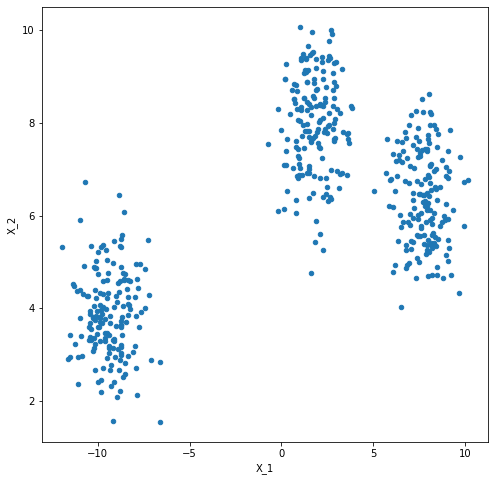

In [7]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [8]:
# def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
# ## write code here for the Distance function here # 
#     Cluster_Distance = pd.DataFrame()
#     if Distance_Type=="Ecluidian distance":
#         for i in range(len(Cluster_Centroids)):
#             array=[]
#             for j in range(len(Data_points)):
#                 dist=np.linalg.norm(Data_points[j] - Cluster_Centroids[i])
#                 array = np.append( array,dist)
#             Cluster_Distance[i]=array      
#     else:
        
#          Cluster_Distance=np.corrcoef(Data_points,Cluster_Centroids)
#     return Cluster_Distance 

# calculates euclid distance for two points
# def euclid_calculator(x1, y1, x2, y2):
#     distance = np.sqrt(np.square(abs(x1 - x2)) + np.square(abs(y1 - y2))) # euclid distance formula
#     return distance


# def calculate_dist(df_dist, x_list, y_list, k):
#     obj_func = {} # stores object functions for each distances
#     total_points = {} # stores all data points for each cluster centroids
#     # creates points with names according to number of k
#     for x in range(1, k + 1):
#         name = 'point_'
#         obj_func[name + str(x)] = 0
#         total_points[name + str(x)] = []

#     for index, row in df_dist.iterrows():
#         points_distance = {}
#         for x in range(1, k+1):
#             name = 'point_'
#             points_distance[name + str(x)] = 0
#         for x, y, point in zip(x_list, y_list, points_distance.keys()):
#             distance = euclid_calculator(x, y, row['x'], row['y']) # calculates distance for determine point is close to which center
#             df_dist.loc[index, point] = distance # stores points with distances
#             points_distance[point] = distance

#         # sorts for finding every point close to which center
#         sorted_dist = sorted(points_distance.items(), key=lambda kv: kv[1])
#         point = [row['x'], row['y']]
#         point_type = sorted_dist[0][0]
#         obj_func[point_type] += np.square(sorted_dist[0][1])
#         df_dist.loc[index, 'point_type'] = point_type
#         total_points[point_type].append(tuple(point))

#     return df_dist, total_points, obj_func

# def total_dist(dist):
#     dist_sum = 0
#     for item in dist:
#         dist_sum += item
#     return dist_sum

In [9]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    correlation=[]
    Cluster_Distance = pd.DataFrame()
    if Distance_Type=="Euclidian distance":
        for i in range(len(Cluster_Centroids)):
            array=[]
            for j in range(len(Data_points)):
                dist=np.linalg.norm(Data_points[j] - Cluster_Centroids[i])
                array = np.append( array,dist)
            Cluster_Distance[i]=array      
    else:
        if Distance_Type=="Pearson distance":
            correlation=Cdist(Data_points, Cluster_Centroids, "correlation")
            print(correlation)
    return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [10]:
def init_centroids(k, X):
    arr = [] #will store initial centroids points
    if len(X[0])==2:   
        for i in range(k):
            cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        
            cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
            arr.append([cx1, cx2])
#     else:
#          if len(X[i])==3:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 arr.append([cx1, cx2, cx3])
#     else:
#          if len(X[i])==4:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 cx4 = np.random.uniform(min(X[:,3]), max(X[:,3]))
#                 arr.append([cx1, cx2, cx3, cx4])
                
#     else:
#          if len(X[i])==5:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 cx4 = np.random.uniform(min(X[:,3]), max(X[:,3]))
#                 cx5 = np.random.uniform(min(X[:,4]), max(X[:,4]))
#                 arr.append([cx1, cx2, cx3, cx4, cx5])
    
#     else:
#          if len(X[i])==6:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 cx4 = np.random.uniform(min(X[:,3]), max(X[:,3]))
#                 cx5 = np.random.uniform(min(X[:,4]), max(X[:,4]))
#                 cx6 = np.random.uniform(min(X[:,5]), max(X[:,5]))
#                 arr.append([cx1, cx2, cx3, cx4, cx5 ,cx6])
#     else:
#          if len(X[i])==7:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 cx4 = np.random.uniform(min(X[:,3]), max(X[:,3]))
#                 cx5 = np.random.uniform(min(X[:,4]), max(X[:,4]))
#                 cx6 = np.random.uniform(min(X[:,5]), max(X[:,5]))
#                 cx7 = np.random.uniform(min(X[:,6]), max(X[:,6]))
#                 arr.append([cx1, cx2, cx3, cx4, cx5 ,cx6, cx7]) 
#     else:
#          if len(X[i])==8:   
#             for i in range(k):
#                 cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
#                 cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
#                 cx3 = np.random.uniform(min(X[:,2]), max(X[:,2]))
#                 cx4 = np.random.uniform(min(X[:,3]), max(X[:,3]))
#                 cx5 = np.random.uniform(min(X[:,4]), max(X[:,4]))
#                 cx6 = np.random.uniform(min(X[:,5]), max(X[:,5]))
#                 cx7 = np.random.uniform(min(X[:,6]), max(X[:,6]))
#                 cx8 = np.random.uniform(min(X[:,7]), max(X[:,7]))
#                 arr.append([cx1, cx2, cx3, cx4, cx5 ,cx6, cx7, cx8])        
    
    
    return np.asarray(arr)
#this function picks random initial centroids

In [11]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))
#basic distance function

In [12]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
           # print(dist_arr)
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    #print(cluster)
    return np.asarray(cluster)
#assigns points to clusters based on the closest one 

In [13]:
#k is number of clusters
# X is my data (array of points)
#cluster is array that shows the assignment of each point to which cluster 
def compute_centroids(k, X, cluster):
    cg_arr = [] #cluster group array
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    print(cg_arr)
    return np.asarray(cg_arr)

In [14]:
def distortion(k, X, cg_prev):
        summ=0
        dist_arr=[]
        clustergroup=[]
        #clustergroup= compute_centroids(k, X, clutser)
        for i in range (k):
            
            for j in range (len(X)):  
                summ=summ+(dist(X[j],cg_prev[i]))**2
                dist_arr.append(summ)
        Metric=summ/ len(X)
   
   
        print("the metric is: ", Metric)
        print("the sum is: " , summ)
        return dist_arr

In [15]:
def elbow():
    distortions=distortion(k,X,cg_prev)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

In [16]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    print(res)
    return res

In [17]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green', 3:'c', 4:'m', 5:'y', 6:'navy', 7:'limegreen', 8:'brown', 9:'deeppink', 10:'grey' }
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [18]:
def GUC_Kmean( k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        distortion(k, X, cg_prev)
        cg_prev = cg_new
        
        
    return cluster

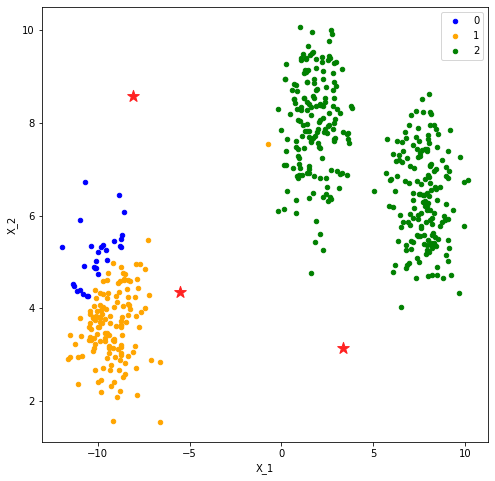

[array([-10.06452817,   5.14124797]), array([-9.16797502,  3.61346129]), array([4.78757395, 7.18909432])]
12.005106221107518
the metric is:  292.048680471517
the sum is:  146024.34023575851


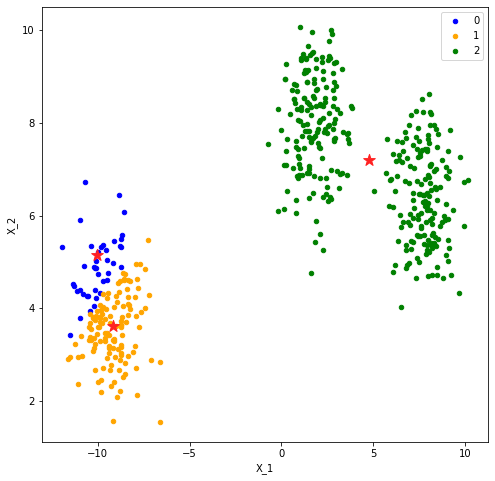

[array([-10.04109692,   4.9043544 ]), array([-9.15694185,  3.51310653]), array([4.77099689, 7.19013597])]
0.3556187453295956
the metric is:  383.9318010107793
the sum is:  191965.90050538964


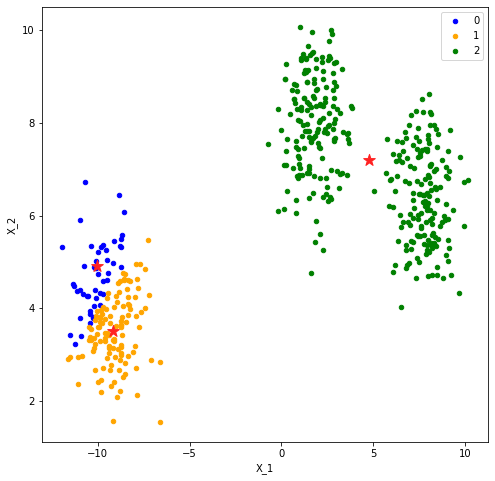

[array([-10.09904202,   4.71915357]), array([-9.0722192 ,  3.49554121]), array([4.77099689, 7.19013597])]
0.2805784594762617
the metric is:  384.10804752841193
the sum is:  192054.02376420595


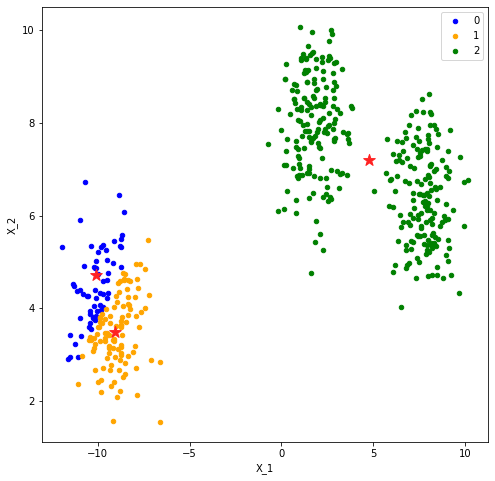

[array([-10.14113673,   4.51117416]), array([-8.930413  ,  3.47652593]), array([4.77099689, 7.19013597])]
0.3552720331386944
the metric is:  384.28830393576214
the sum is:  192144.15196788107


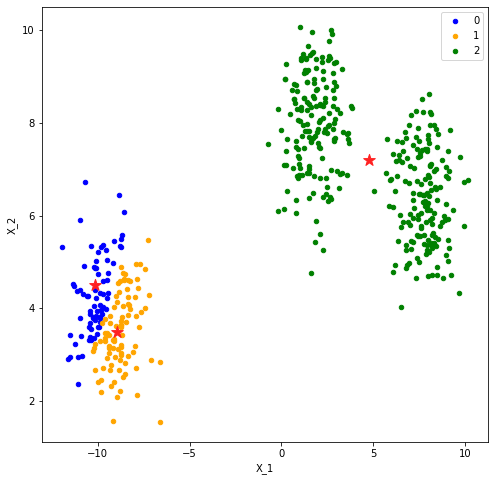

[array([-10.16384054,   4.30815158]), array([-8.74107071,  3.49362641]), array([4.77099689, 7.19013597])]
0.3944010471340223
the metric is:  383.2821075857833
the sum is:  191641.05379289165


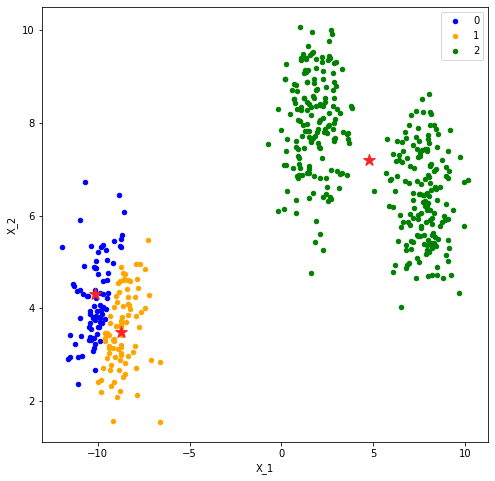

[array([-10.15023876,   4.21770605]), array([-8.63686312,  3.51273714]), array([4.77099689, 7.19013597])]
0.19740802959533046
the metric is:  380.9631103731379
the sum is:  190481.55518656896


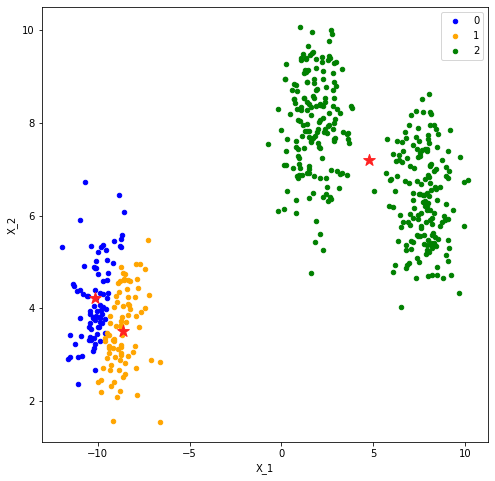

[array([-10.14334826,   4.20854475]), array([-8.62557319,  3.51328783]), array([4.77099689, 7.19013597])]
0.02276671057178819
the metric is:  379.08904902314146
the sum is:  189544.52451157072


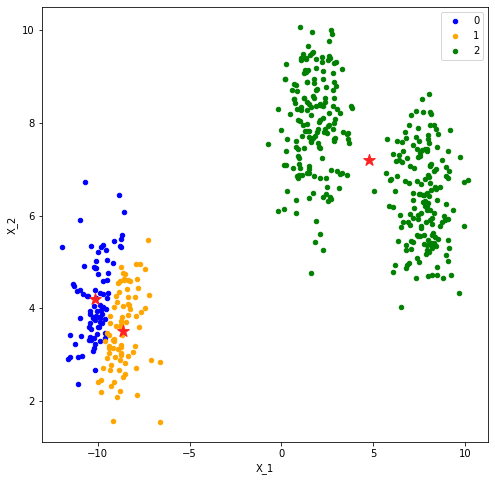

[array([-10.13715501,   4.19824404]), array([-8.61347999,  3.51521195]), array([4.77099689, 7.19013597])]
0.02426450687778615
the metric is:  378.78305634141924
the sum is:  189391.52817070961


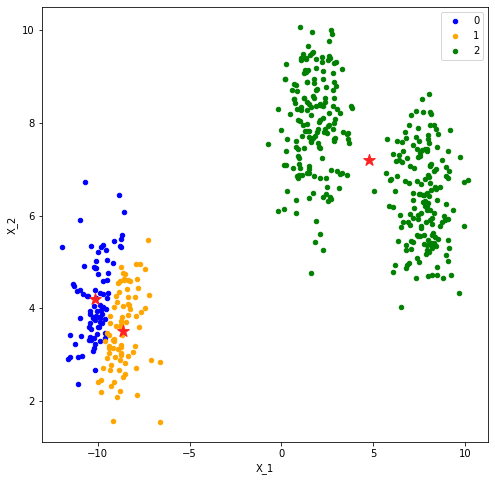

[array([-10.13715501,   4.19824404]), array([-8.61347999,  3.51521195]), array([4.77099689, 7.19013597])]
0.0
the metric is:  378.4751019267398
the sum is:  189237.5509633699


In [19]:
cluster = GUC_Kmean(3, X_train) #testing on random data set

In [20]:
#def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
       # write your your loop 
    
   # return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [21]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [22]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

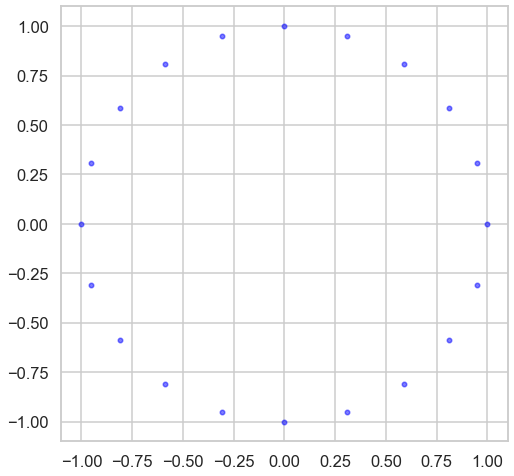

In [23]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

centroids=init_centroids(8, X)
#print(centroids)
#print(X)
#GUC_Distance(centroids,X,"Ecluidian distance")
#assign_cluster(8, X, centroids)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

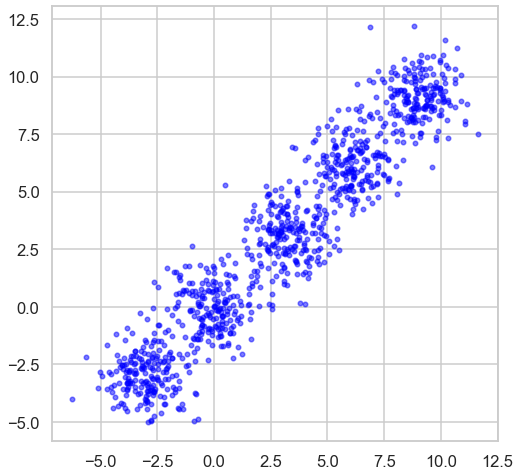

In [24]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

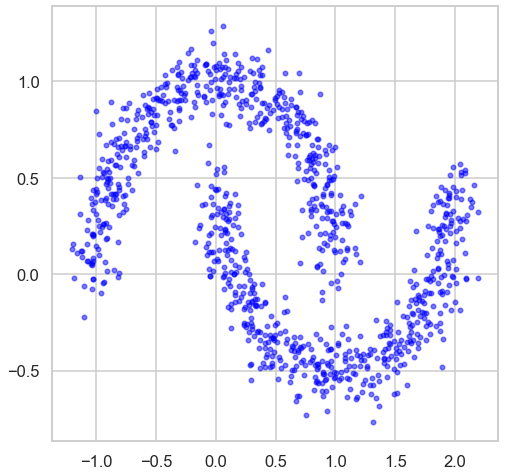

In [25]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

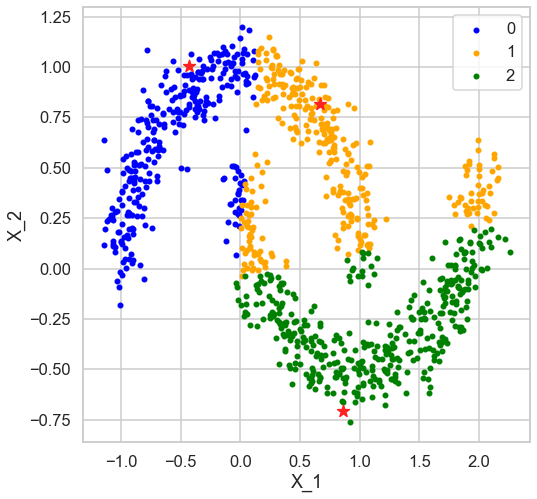

[array([-0.53142651,  0.62430607]), array([0.75119881, 0.52787758]), array([ 1.10033408, -0.28285292])]
1.1824217386802816
the metric is:  5.865993559047339
the sum is:  5865.993559047339


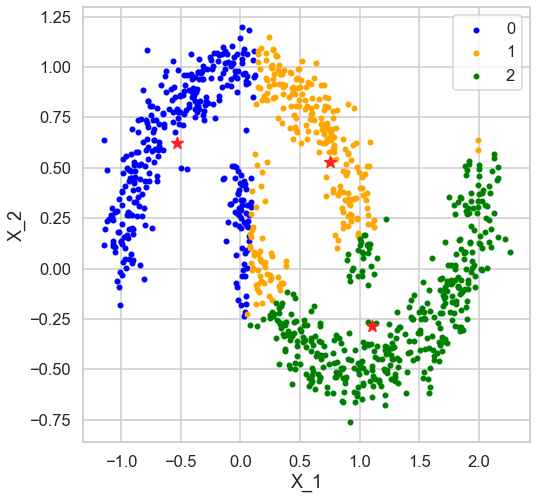

[array([-0.47306361,  0.57203369]), array([0.55425986, 0.54997294]), array([ 1.26472096, -0.21263859])]
0.45527827049519454
the metric is:  5.0205240559870115
the sum is:  5020.524055987012


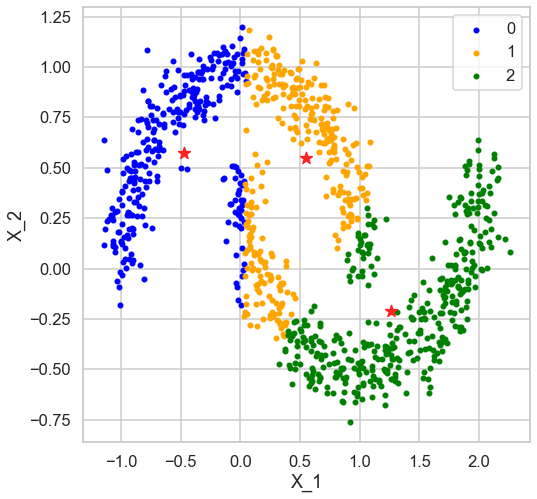

[array([-0.53249063,  0.58870397]), array([0.45898633, 0.47339992]), array([ 1.33253753, -0.19745255])]
0.2534481746263306
the metric is:  4.974373317999532
the sum is:  4974.373317999532


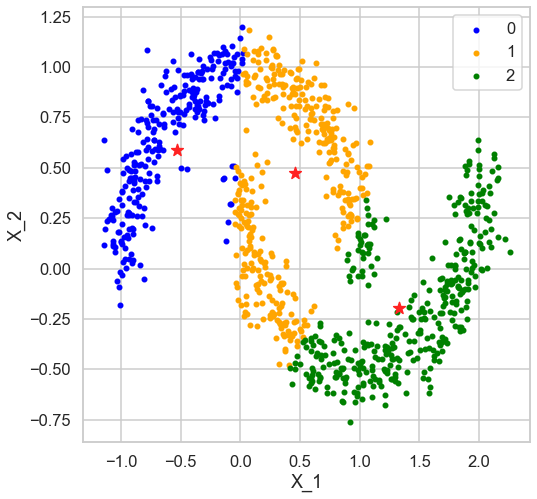

[array([-0.60517205,  0.62625899]), array([0.41274057, 0.41061389]), array([ 1.38370956, -0.18833811])]
0.2117671606395842
the metric is:  5.15786547079624
the sum is:  5157.8654707962405


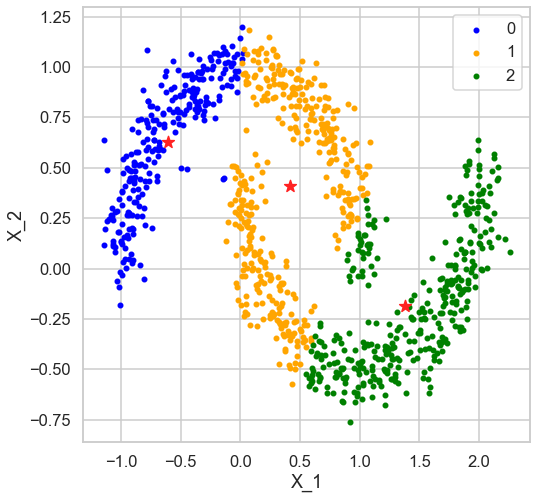

[array([-0.62205651,  0.63221459]), array([0.40543004, 0.38725211]), array([ 1.41082266, -0.18082443])]
0.0705178821619962
the metric is:  5.4018744839188715
the sum is:  5401.874483918871


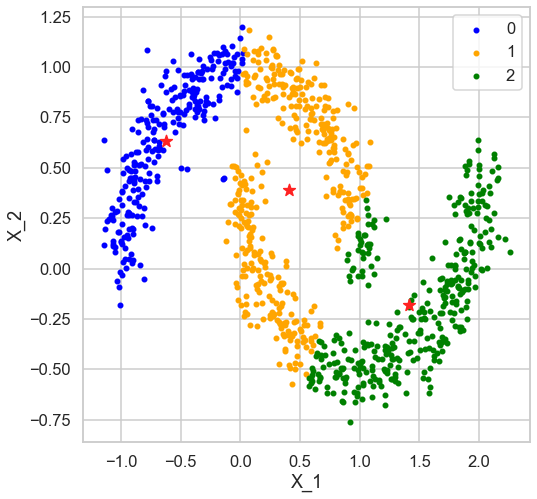

[array([-0.61957918,  0.63372925]), array([0.40970166, 0.37412469]), array([ 1.42434659, -0.17763952])]
0.03060249468397165
the metric is:  5.480417765009405
the sum is:  5480.417765009405


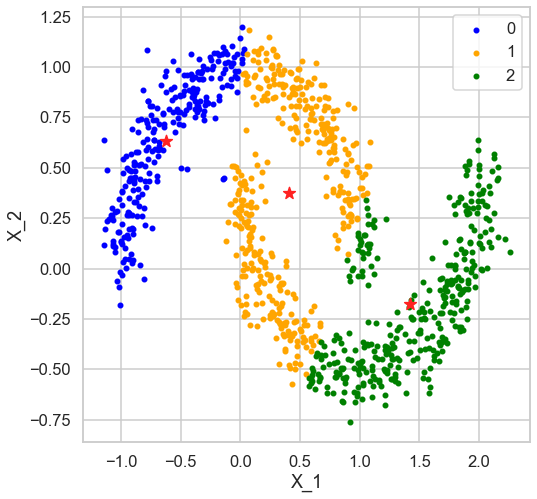

[array([-0.61703449,  0.63550622]), array([0.41253707, 0.36968432]), array([ 1.42803552, -0.17784098])]
0.012066579680186366
the metric is:  5.493741197236609
the sum is:  5493.741197236609


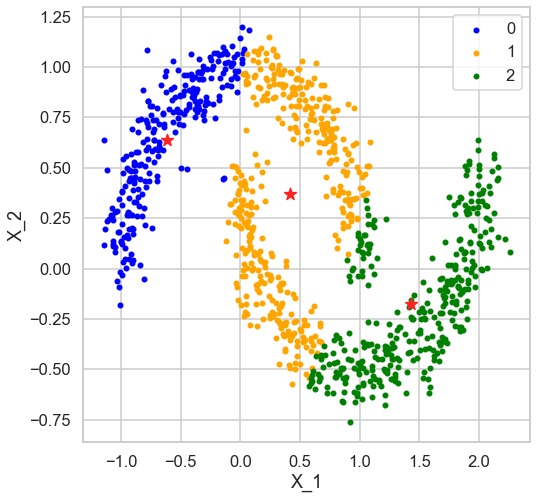

[array([-0.61437661,  0.63763802]), array([0.41551103, 0.35932765]), array([ 1.43738383, -0.17463614])]
0.024064796979918146
the metric is:  5.494775395030304
the sum is:  5494.775395030304


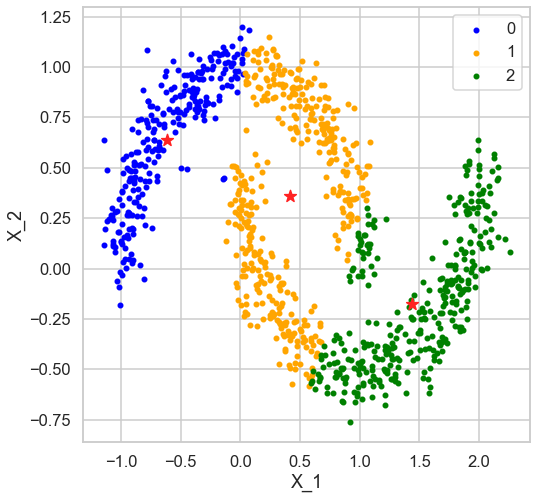

[array([-0.61192974,  0.63889471]), array([0.42109742, 0.34821564]), array([ 1.45001408, -0.17269085])]
0.02796712870130868
the metric is:  5.502214790605924
the sum is:  5502.2147906059245


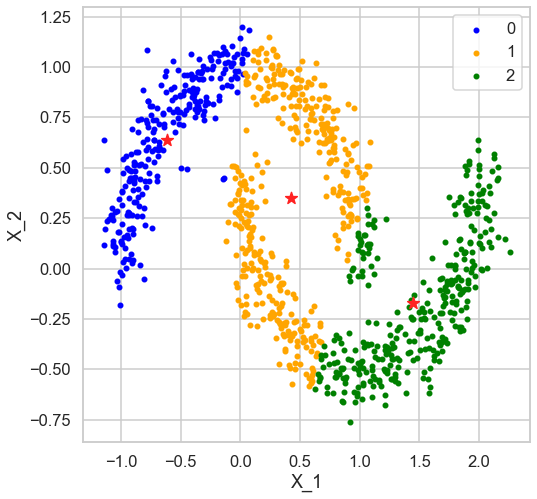

[array([-0.60935962,  0.64053252]), array([0.4233467 , 0.33980949]), array([ 1.45758206, -0.16936688])]
0.02001525034838732
the metric is:  5.516568403027577
the sum is:  5516.568403027577


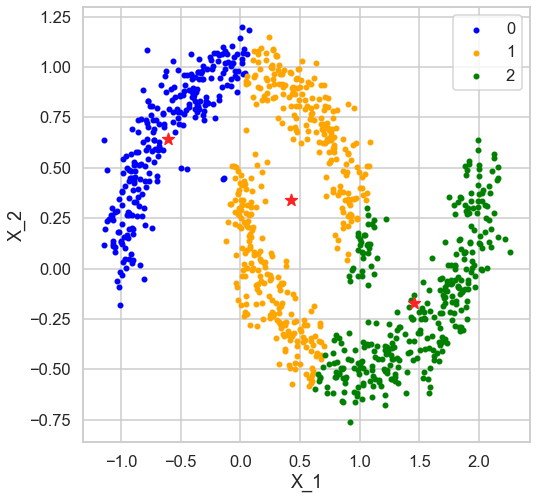

[array([-0.60686969,  0.64179054]), array([0.42623103, 0.33264161]), array([ 1.46453251, -0.16710392])]
0.017825698557462306
the metric is:  5.521763800024153
the sum is:  5521.763800024152


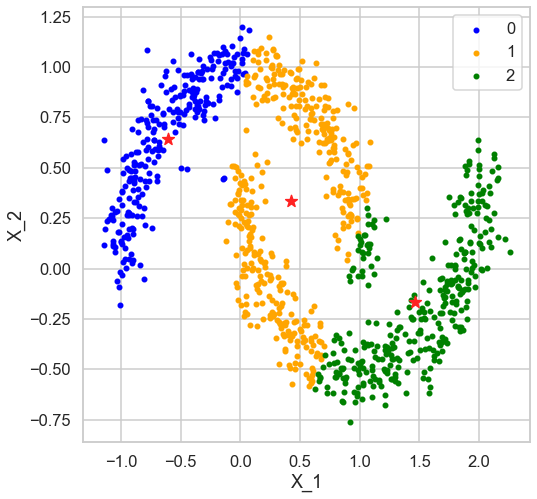

[array([-0.60686969,  0.64179054]), array([0.42760805, 0.33225602]), array([ 1.46597184, -0.16813648])]
0.0032013802598694885
the metric is:  5.526946084337777
the sum is:  5526.946084337777


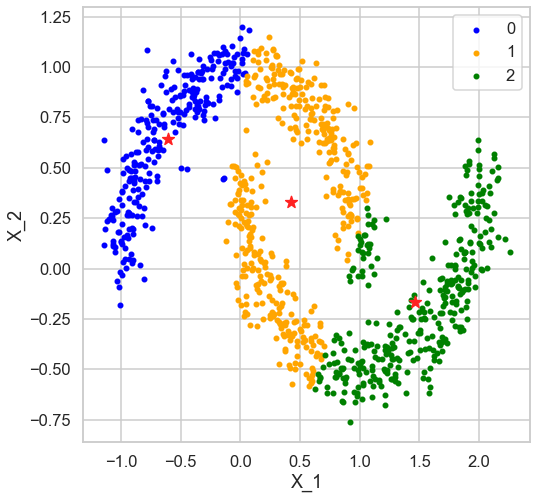

[array([-0.60686969,  0.64179054]), array([0.42760805, 0.33225602]), array([ 1.46597184, -0.16813648])]
0.0
the metric is:  5.530300345197847
the sum is:  5530.300345197847


In [26]:
n_samples = 1000
example3, _ =noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster = GUC_Kmean(3, example3)

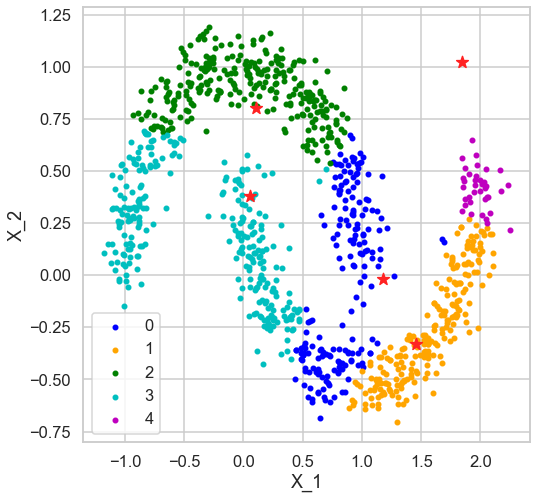

[array([ 0.83621708, -0.0365759 ]), array([ 1.55449728, -0.26050952]), array([0.04676681, 0.88583755]), array([-0.31416397,  0.18732359]), array([1.98690142, 0.41562078])]
1.605131581647755
the metric is:  9.960003560517922
the sum is:  9960.003560517922


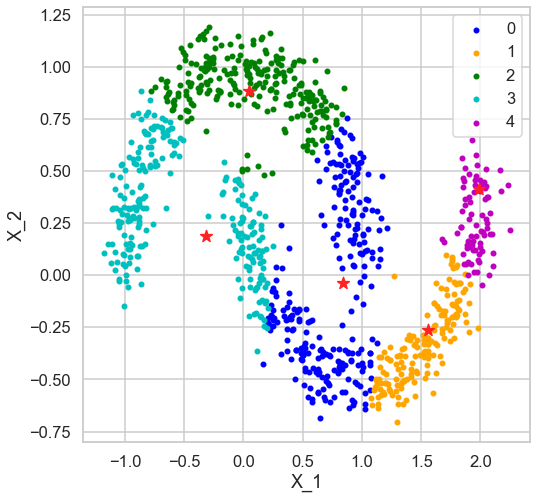

[array([ 0.7415379 , -0.05794187]), array([ 1.50860312, -0.32491933]), array([0.07934272, 0.89908254]), array([-0.49335403,  0.29344888]), array([1.96430931, 0.26593161])]
0.5709566187482606
the metric is:  10.185611388496772
the sum is:  10185.611388496773


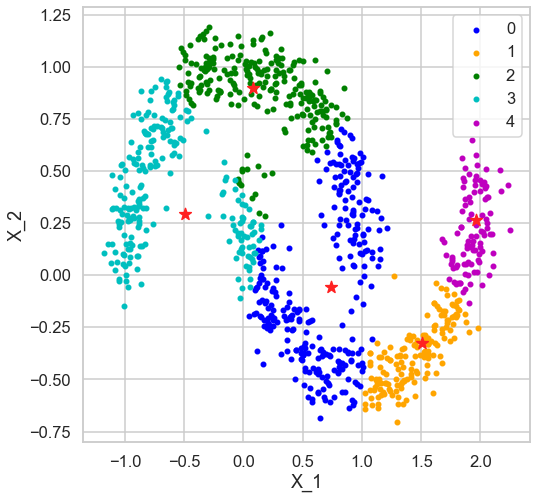

[array([ 0.65723861, -0.05049612]), array([ 1.44401957, -0.37433126]), array([0.15119391, 0.88515339]), array([-0.6222613 ,  0.39978038]), array([1.93282821, 0.21376599])]
0.4671660144077341
the metric is:  10.332207489245691
the sum is:  10332.207489245691


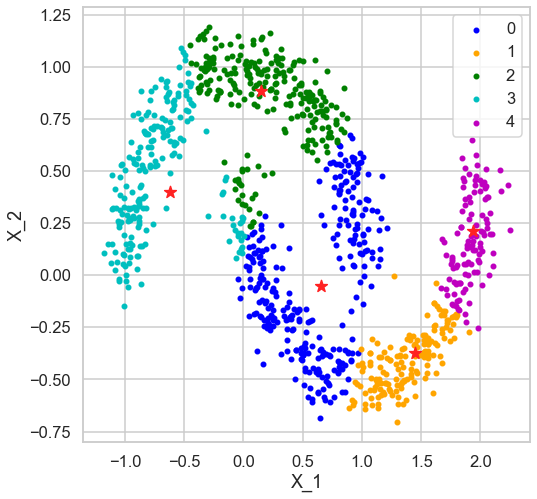

[array([ 0.59369345, -0.03319224]), array([ 1.3721906 , -0.40563244]), array([0.19826356, 0.85089819]), array([-0.72104941,  0.47603494]), array([1.91587552, 0.16909412])]
0.3750023932386856
the metric is:  10.354956649867498
the sum is:  10354.956649867498


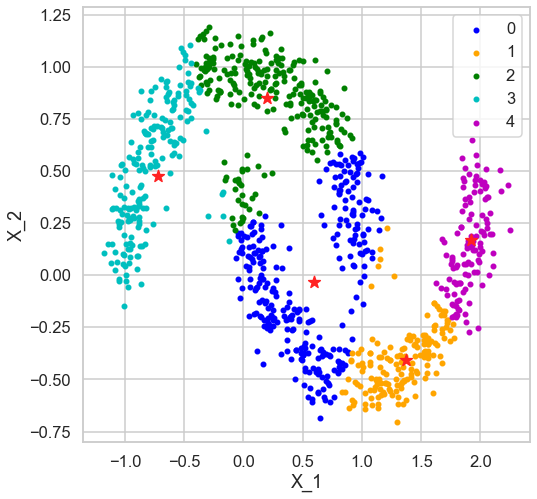

[array([ 0.54393581, -0.02404233]), array([ 1.32650469, -0.40217186]), array([0.21366649, 0.83500718]), array([-0.77951922,  0.51357433]), array([1.907705  , 0.14823218])]
0.21042769501091554
the metric is:  10.380714956193229
the sum is:  10380.71495619323


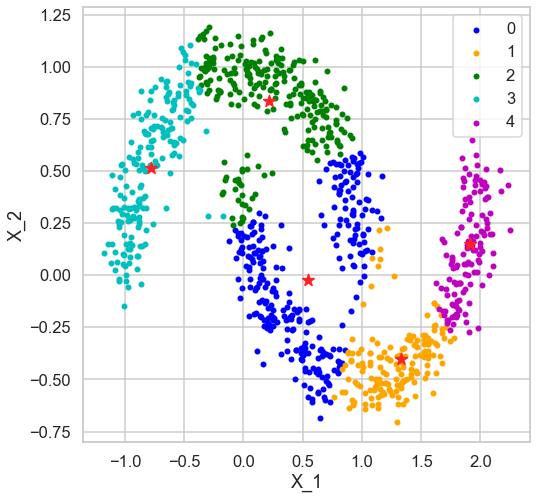

[array([ 0.52447955, -0.01590275]), array([ 1.28252285, -0.40524957]), array([0.21690176, 0.83437626]), array([-0.78730565,  0.51928493]), array([1.89380399, 0.1231549 ])]
0.10680433855738256
the metric is:  10.402743463597286
the sum is:  10402.743463597286


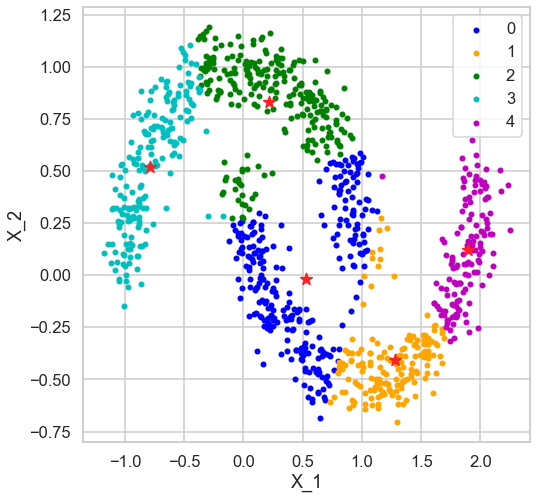

[array([ 0.50124689, -0.0035004 ]), array([ 1.23876033, -0.4059977 ]), array([0.22260111, 0.84116969]), array([-0.78513219,  0.52155842]), array([1.87722327, 0.10849012])]
0.10425292510116838
the metric is:  10.316714194458973
the sum is:  10316.714194458973


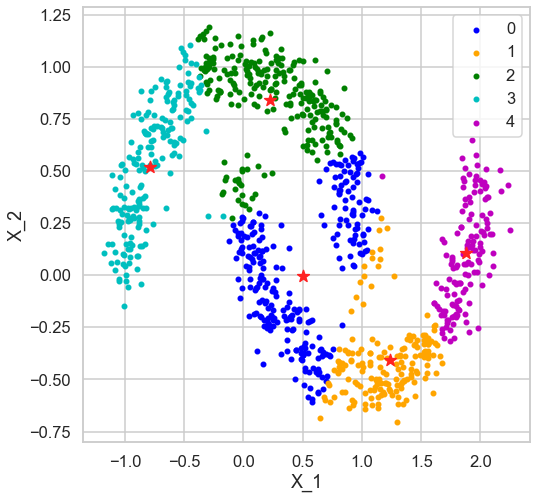

[array([0.48320245, 0.01541755]), array([ 1.20112406, -0.40546389]), array([0.22698365, 0.84562012]), array([-0.78289022,  0.52358903]), array([1.87300879, 0.10008291])]
0.0824590439613997
the metric is:  10.201817898089908
the sum is:  10201.817898089908


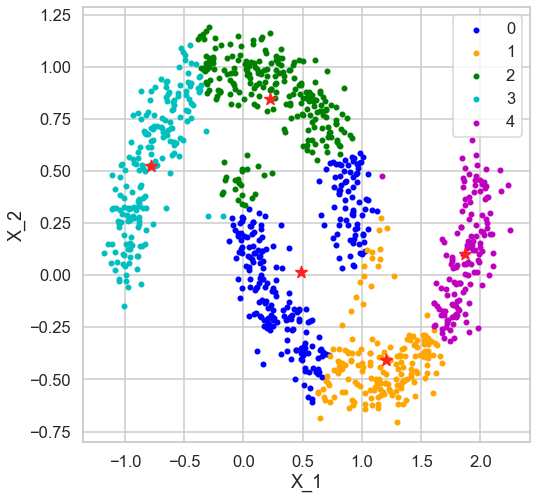

[array([0.46987743, 0.0321042 ]), array([ 1.1737156 , -0.40657674]), array([0.23169956, 0.84982504]), array([-0.78073606,  0.52583577]), array([1.86927913, 0.0952279 ])]
0.06433831682095532
the metric is:  10.126607937328695
the sum is:  10126.607937328694


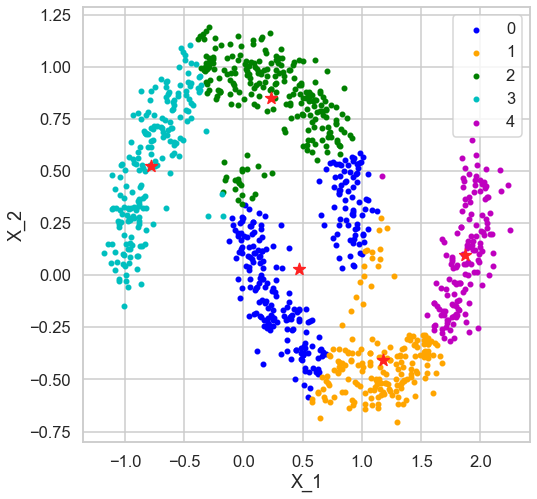

[array([0.46316935, 0.04182004]), array([ 1.15669353, -0.40812623]), array([0.23442518, 0.85401246]), array([-0.77764624,  0.52514881]), array([1.86517717, 0.09070401])]
0.04316735575306563
the metric is:  10.07259841661457
the sum is:  10072.59841661457


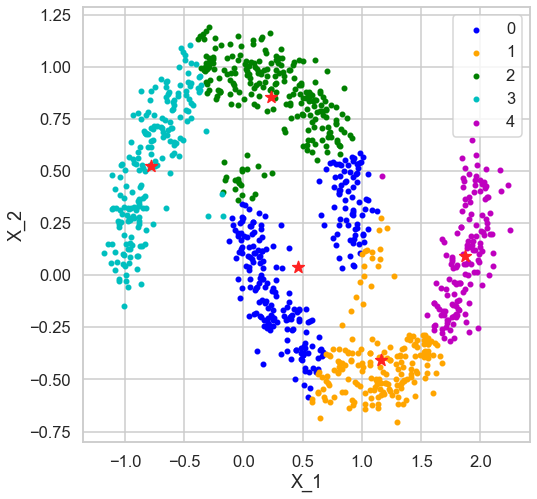

[array([0.45676095, 0.04864888]), array([ 1.14776844, -0.40587223]), array([0.23547547, 0.85622277]), array([-0.77764624,  0.52514881]), array([1.86517717, 0.09070401])]
0.021017340708273175
the metric is:  10.033621660853736
the sum is:  10033.621660853736


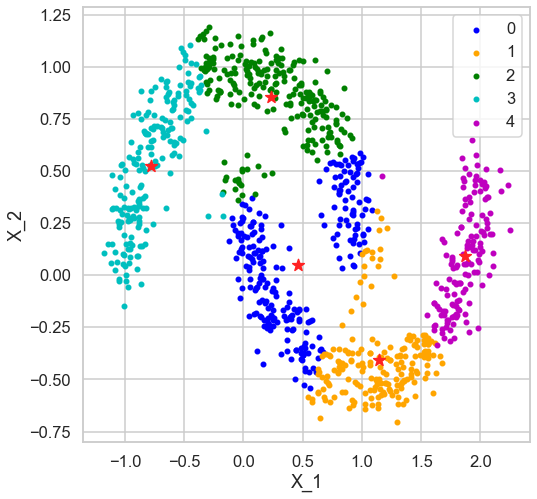

[array([0.44950075, 0.05715261]), array([ 1.13431115, -0.40342839]), array([0.23619495, 0.85832433]), array([-0.77764624,  0.52514881]), array([1.86355549, 0.08773597])]
0.0304622869857875
the metric is:  10.018751564014687
the sum is:  10018.751564014687


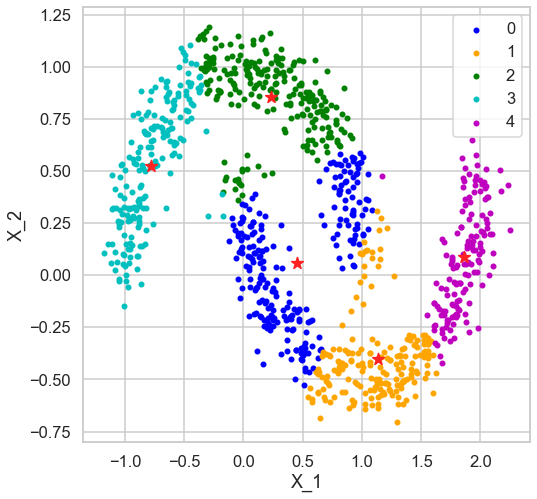

[array([0.44285489, 0.06658249]), array([ 1.11681427, -0.39913831]), array([0.23426862, 0.86158544]), array([-0.77764624,  0.52514881]), array([1.85921347, 0.07819142])]
0.04382494930348744
the metric is:  9.99415678082357
the sum is:  9994.15678082357


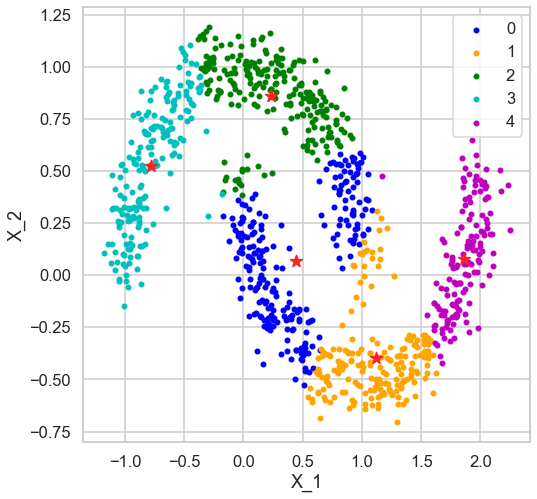

[array([0.43243734, 0.0726475 ]), array([ 1.11005523, -0.39436961]), array([0.23551384, 0.86378981]), array([-0.78079183,  0.52638828]), array([1.85921347, 0.07819142])]
0.02623914840889321
the metric is:  9.959949454304311
the sum is:  9959.949454304311


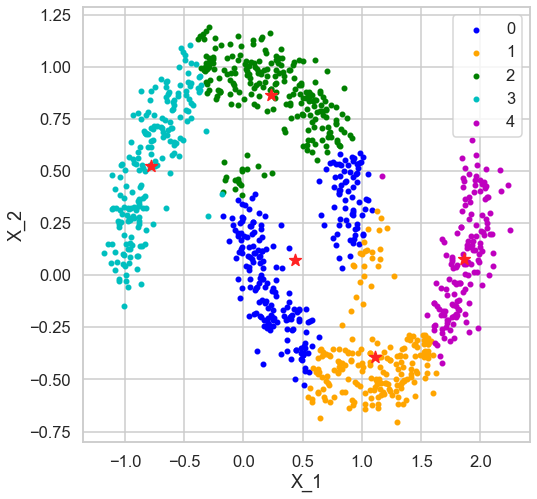

[array([0.42824188, 0.07606631]), array([ 1.10479964, -0.39136436]), array([0.23551384, 0.86378981]), array([-0.78079183,  0.52638828]), array([1.85921347, 0.07819142])]
0.011466181478217673
the metric is:  9.955235430314609
the sum is:  9955.23543031461


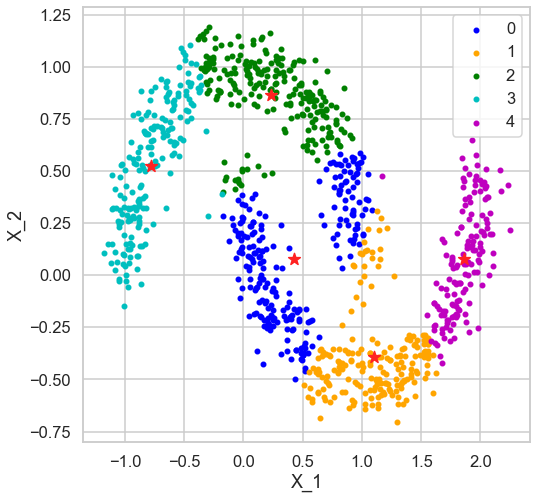

[array([0.42543603, 0.08230441]), array([ 1.09676359, -0.39279766]), array([0.23660463, 0.86591154]), array([-0.78079183,  0.52638828]), array([1.85732392, 0.07552566])]
0.020656172861637852
the metric is:  9.944300736730249
the sum is:  9944.300736730249


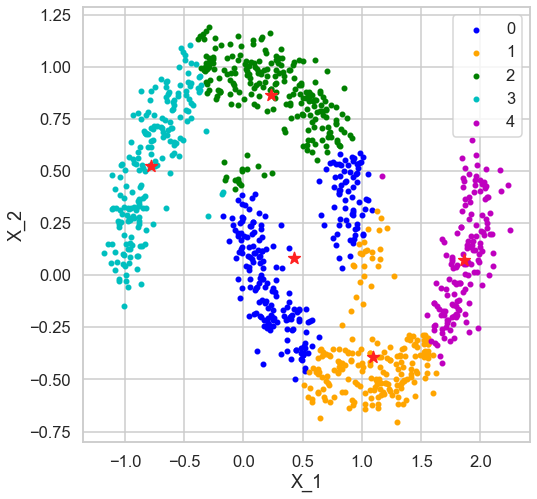

[array([0.42305245, 0.08201084]), array([ 1.09617776, -0.3901085 ]), array([0.23843282, 0.86797266]), array([-0.77766785,  0.52574793]), array([1.85732392, 0.07552566])]
0.011097844758479148
the metric is:  9.932492581542236
the sum is:  9932.492581542236


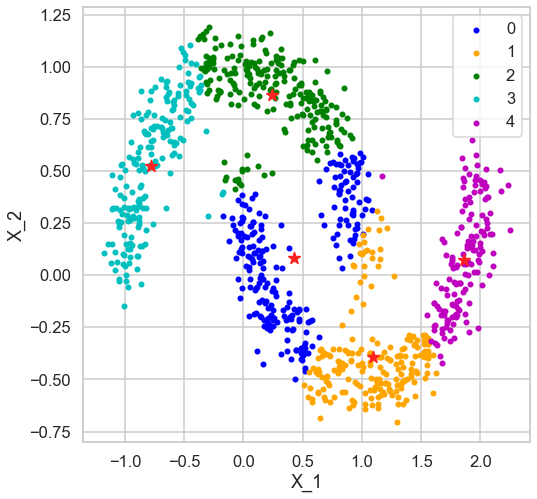

[array([0.42052789, 0.08152603]), array([ 1.09573465, -0.3872311 ]), array([0.23843282, 0.86797266]), array([-0.77766785,  0.52574793]), array([1.85732392, 0.07552566])]
0.0054820132094948425
the metric is:  9.92206964218412
the sum is:  9922.06964218412


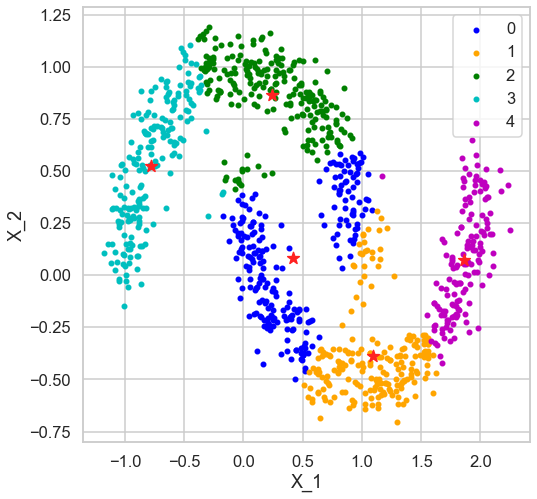

[array([0.41797864, 0.08101172]), array([ 1.09529897, -0.38435342]), array([0.23843282, 0.86797266]), array([-0.77766785,  0.52574793]), array([1.85732392, 0.07552566])]
0.005511091276127399
the metric is:  9.918403308800588
the sum is:  9918.403308800589


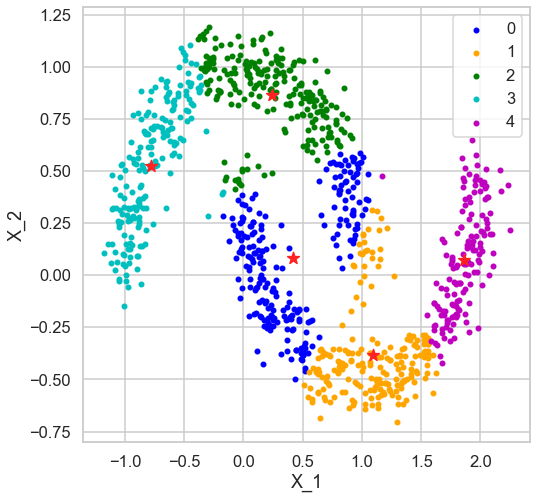

[array([0.41507524, 0.07998958]), array([ 1.09523827, -0.38094154]), array([0.23843282, 0.86797266]), array([-0.77766785,  0.52574793]), array([1.85732392, 0.07552566])]
0.006490480221729286
the metric is:  9.914789407317796
the sum is:  9914.789407317796


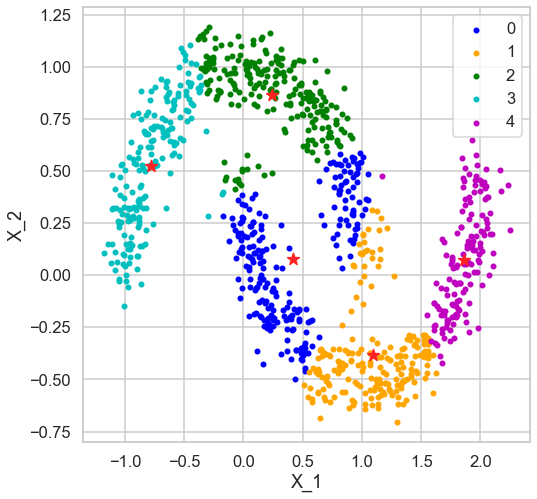

[array([0.41507524, 0.07998958]), array([ 1.09523827, -0.38094154]), array([0.23843282, 0.86797266]), array([-0.77766785,  0.52574793]), array([1.85732392, 0.07552566])]
0.0
the metric is:  9.911210575445486
the sum is:  9911.210575445486


In [27]:
n_samples = 1000
example3, _ =noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster = GUC_Kmean(5, example3)

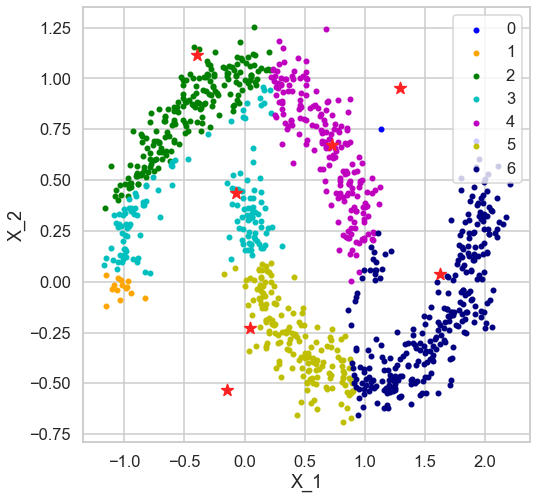

[array([1.53377608, 0.72205106]), array([-1.02928672, -0.03159494]), array([-0.44946126,  0.82786724]), array([-0.38755998,  0.35530096]), array([0.68438094, 0.64906598]), array([ 0.4355368 , -0.28532402]), array([ 1.55905231, -0.14069444])]
2.595354033250525
the metric is:  13.174917710049126
the sum is:  13174.917710049125


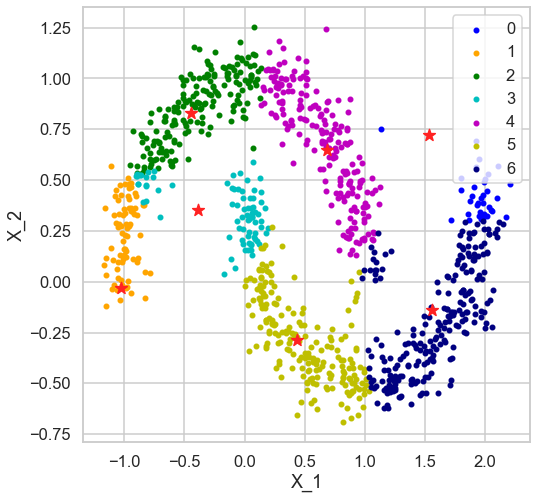

[array([1.94636089, 0.42807811]), array([-0.99649433,  0.22973089]), array([-0.38113661,  0.86091447]), array([-0.16677035,  0.35058007]), array([0.65759384, 0.67083107]), array([ 0.50619509, -0.29036364]), array([ 1.57072087, -0.18737126])]
1.2201809809268505
the metric is:  14.61789991923726
the sum is:  14617.89991923726


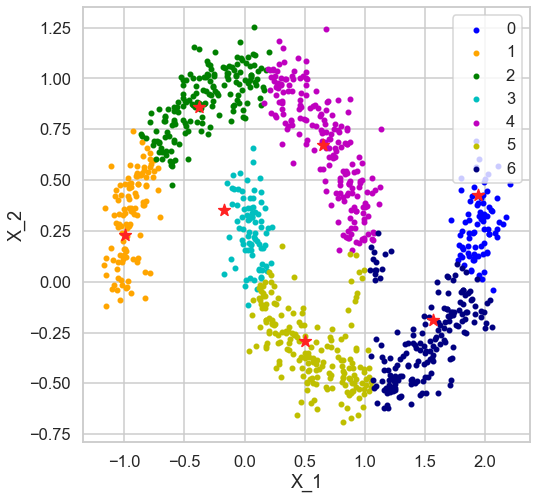

[array([1.94971382, 0.27591827]), array([-0.94723728,  0.32148834]), array([-0.32567331,  0.88862719]), array([0.05103119, 0.25644035]), array([0.66989205, 0.66864927]), array([ 0.56716942, -0.32152371]), array([ 1.49821992, -0.27578774])]
0.7509227635651562
the metric is:  14.920177917230829
the sum is:  14920.177917230829


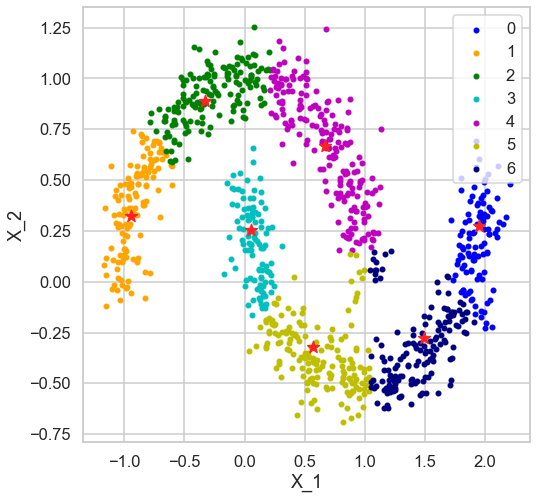

[array([1.93754659, 0.19338644]), array([-0.91674809,  0.36435526]), array([-0.27232617,  0.91756485]), array([0.07570177, 0.19096274]), array([0.6813758 , 0.65905883]), array([ 0.61395909, -0.355253  ]), array([ 1.43345914, -0.31770477])]
0.4164730992153043
the metric is:  14.423821283487444
the sum is:  14423.821283487443


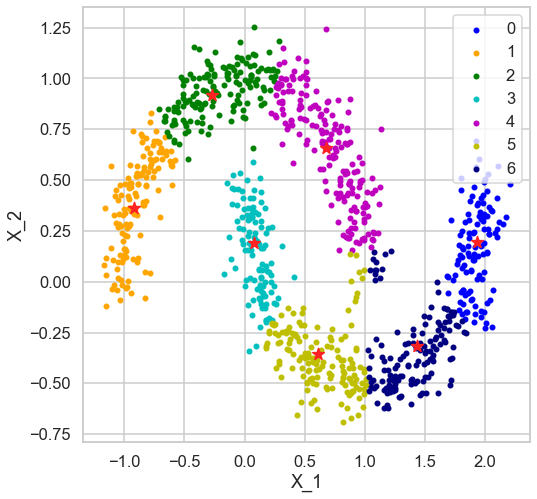

[array([1.92364311, 0.16402338]), array([-0.90051129,  0.38523657]), array([-0.21997488,  0.93563015]), array([0.08936632, 0.14797803]), array([0.69980398, 0.64323988]), array([ 0.63531683, -0.36723051]), array([ 1.39419663, -0.33742087])]
0.25213292219571026
the metric is:  14.211842152670451
the sum is:  14211.842152670451


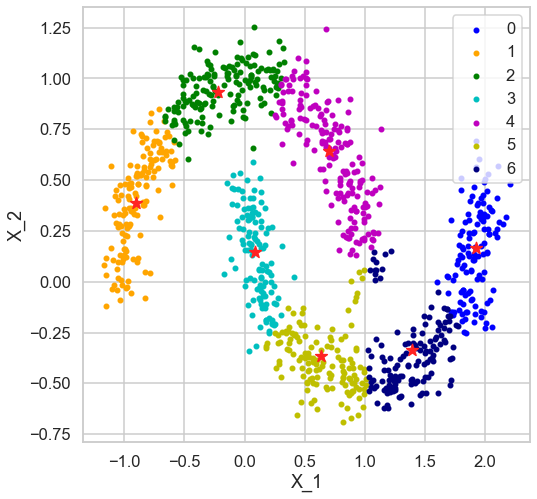

[array([1.91229089, 0.14238198]), array([-0.89165774,  0.39825564]), array([-0.17484724,  0.94482602]), array([0.09925766, 0.12418768]), array([0.72505979, 0.61837913]), array([ 0.65389744, -0.38305422]), array([ 1.37283877, -0.34781598])]
0.19559976821231273
the metric is:  14.043271137044552
the sum is:  14043.271137044552


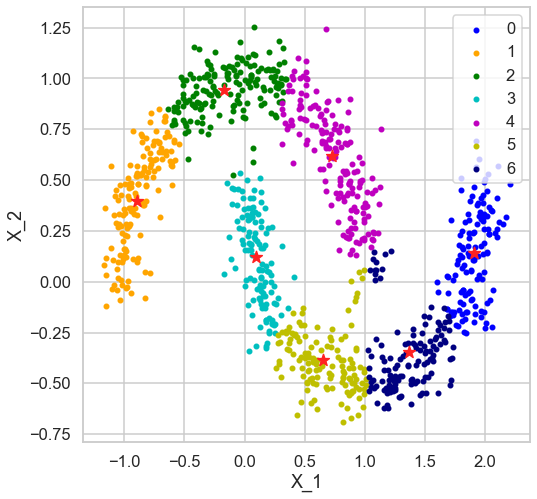

[array([1.90250832, 0.1284476 ]), array([-0.88244822,  0.41054371]), array([-0.13337409,  0.94440052]), array([0.10645112, 0.1014932 ]), array([0.74721945, 0.60260747]), array([ 0.66925733, -0.38737505]), array([ 1.3572581 , -0.35696849])]
0.1588894685134268
the metric is:  13.933354751696587
the sum is:  13933.354751696586


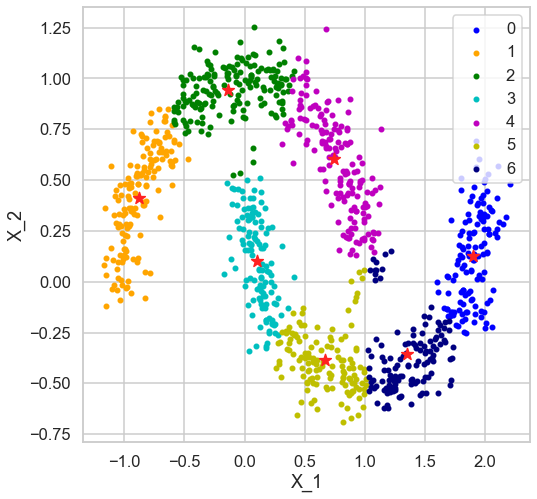

[array([1.8990111 , 0.12415646]), array([-0.87619107,  0.41714856]), array([-0.10503133,  0.94500191]), array([0.10899078, 0.09507282]), array([0.76579471, 0.58603848]), array([ 0.67214882, -0.38829669]), array([ 1.35434763, -0.36433368])]
0.08573285900623154
the metric is:  13.826952764664973
the sum is:  13826.952764664973


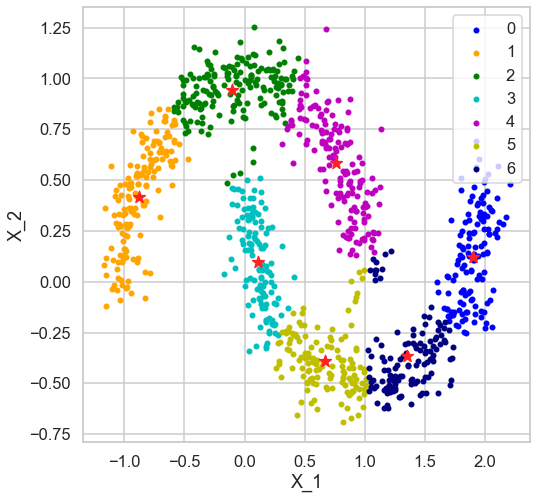

[array([1.89747271, 0.12170352]), array([-0.87044606,  0.42436081]), array([-0.08532831,  0.94532563]), array([0.11104387, 0.09190777]), array([0.77499453, 0.57695159]), array([ 0.67214882, -0.38829669]), array([ 1.35156802, -0.36570148])]
0.051623295135240464
the metric is:  13.773414688253919
the sum is:  13773.414688253919


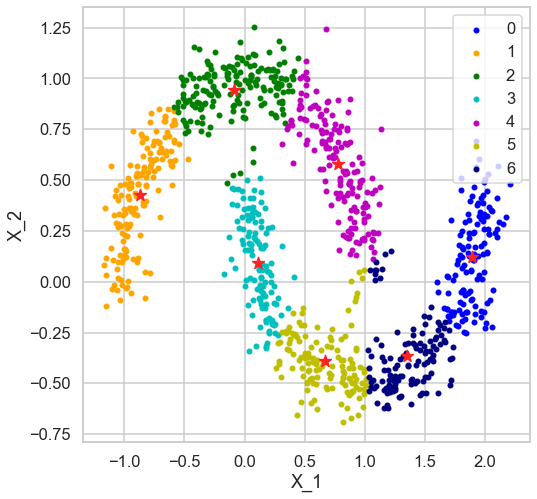

[array([1.89747271, 0.12170352]), array([-0.86862064,  0.4270642 ]), array([-0.08238092,  0.94593758]), array([0.11104387, 0.09190777]), array([0.7767982 , 0.57410406]), array([ 0.67214882, -0.38829669]), array([ 1.35386537, -0.36959177])]
0.01416090857434404
the metric is:  13.728888274249606
the sum is:  13728.888274249606


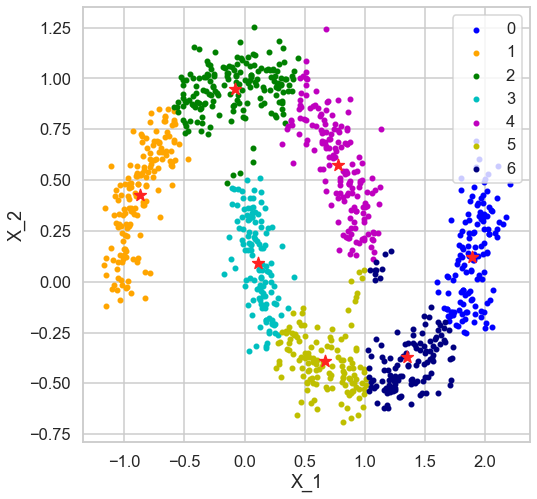

[array([1.89747271, 0.12170352]), array([-0.86862064,  0.4270642 ]), array([-0.08238092,  0.94593758]), array([0.11104387, 0.09190777]), array([0.7767982 , 0.57410406]), array([ 0.67214882, -0.38829669]), array([ 1.35386537, -0.36959177])]
0.0
the metric is:  13.730165474934289
the sum is:  13730.165474934289


In [28]:
n_samples = 1000
example3, _ =noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster = GUC_Kmean(7, example3)

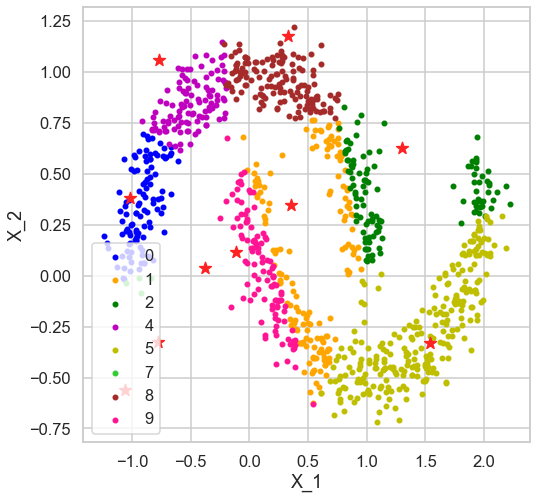

[array([-0.91826308,  0.34212078]), array([0.53176932, 0.08393655]), array([1.29945132, 0.40844403]), nan, array([-0.49621296,  0.84564645]), array([ 1.4497794, -0.2684191]), nan, array([-0.93777472, -0.03531476]), array([0.25146411, 0.95324207]), array([0.11026009, 0.02852291])]
nan
the metric is:  24.071062093019055
the sum is:  24071.062093019056


C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [29]:
n_samples = 1000
example3, _ =noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster = GUC_Kmean(10, example3)

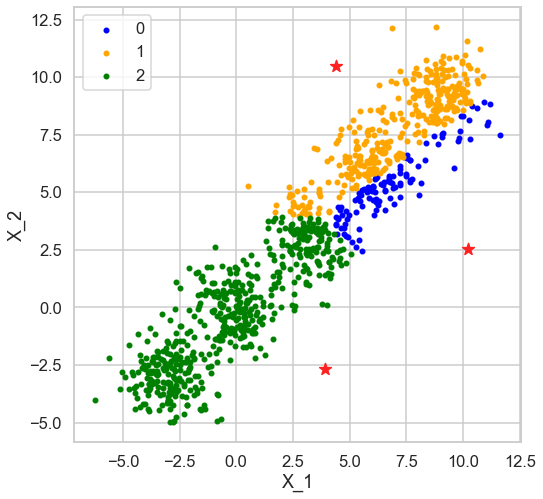

[array([6.83546057, 5.37958907]), array([7.09555037, 7.79378122]), array([-0.2913254 , -0.38645605])]
12.973758481535594
the metric is:  257.18148901362116
the sum is:  257181.48901362115


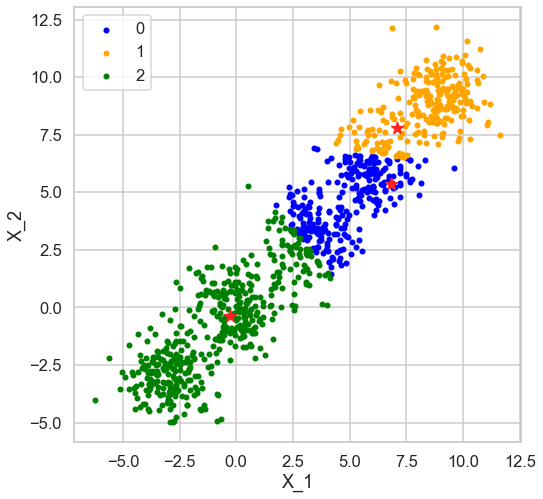

[array([4.8517679 , 4.59880263]), array([8.37699776, 8.73231189]), array([-0.88416016, -0.88358129])]
4.4938843348207715
the metric is:  196.78261895446514
the sum is:  196782.61895446514


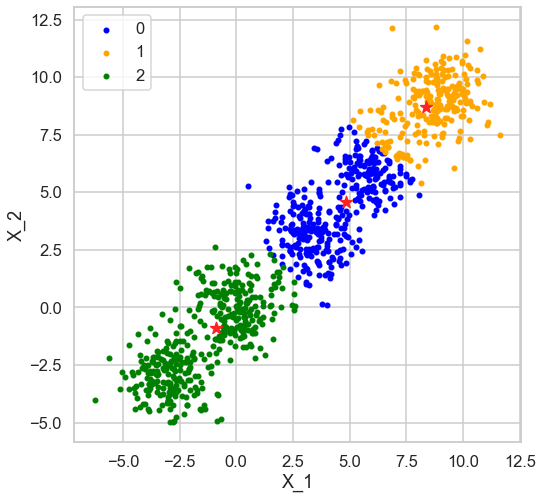

[array([4.38903743, 4.29291978]), array([8.60029397, 8.78252773]), array([-1.46294575, -1.43230468])]
1.5811180642240417
the metric is:  212.40489557102393
the sum is:  212404.89557102392


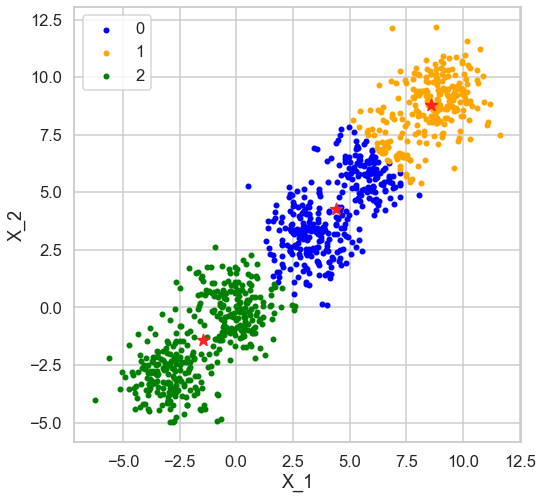

[array([4.2118268 , 4.13212731]), array([8.51244428, 8.64400121]), array([-1.54822491, -1.50536139])]
0.5156135612714894
the metric is:  222.5904474585308
the sum is:  222590.4474585308


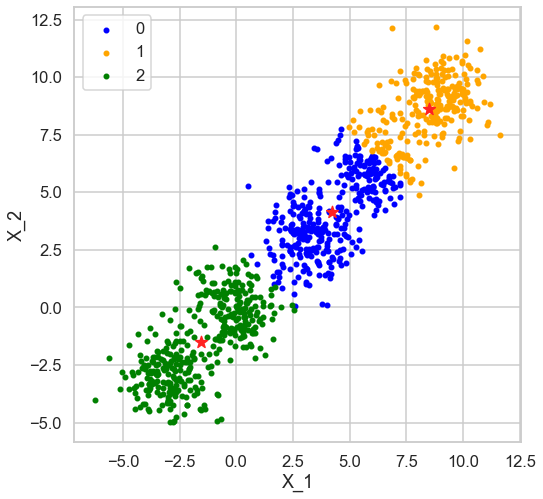

[array([4.12092695, 4.02034355]), array([8.43355159, 8.57955158]), array([-1.58778605, -1.54003598])]
0.2985554515984262
the metric is:  220.6676012720048
the sum is:  220667.6012720048


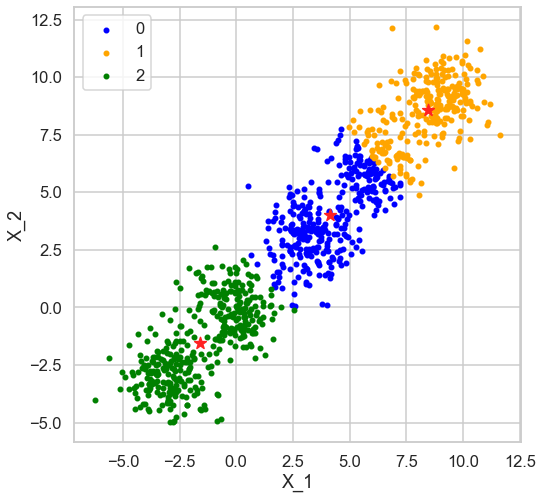

[array([4.06332846, 3.95099304]), array([8.37879   , 8.52216536]), array([-1.60647777, -1.55049872])]
0.19089328692809285
the metric is:  219.3410379231847
the sum is:  219341.0379231847


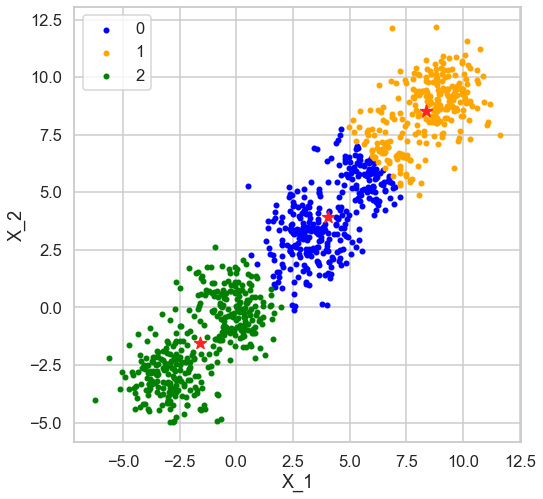

[array([4.036296  , 3.92038012]), array([8.35909628, 8.49483773]), array([-1.61716127, -1.55422805])]
0.0858401238942906
the metric is:  218.1406309737585
the sum is:  218140.6309737585


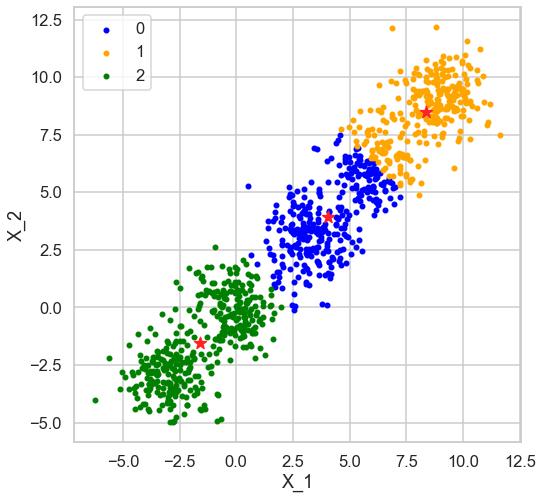

[array([4.00914121, 3.87953267]), array([8.31409845, 8.46121521]), array([-1.61716127, -1.55422805])]
0.10522180106424078
the metric is:  217.65738108746473
the sum is:  217657.38108746472


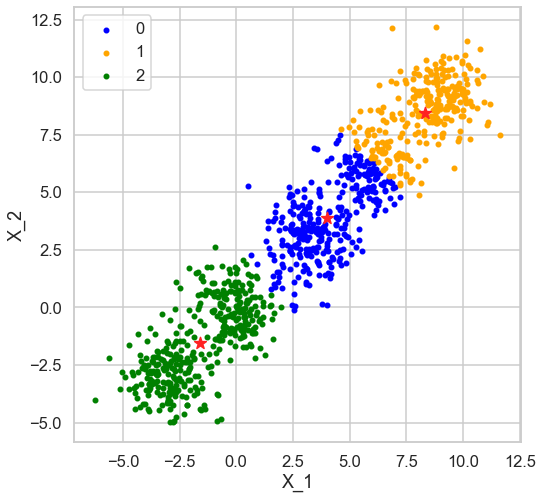

[array([3.99341341, 3.8511917 ]), array([8.29325703, 8.45067995]), array([-1.62530818, -1.56028312])]
0.0659160982991207
the metric is:  216.69295097509996
the sum is:  216692.95097509996


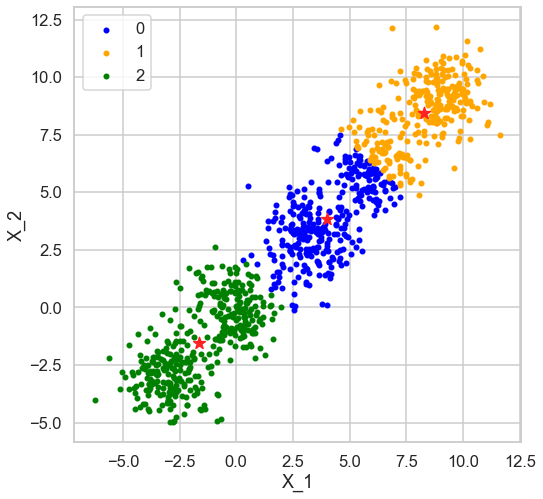

[array([3.96137068, 3.82484137]), array([8.27165521, 8.4262468 ]), array([-1.63024396, -1.56965344])]
0.08468980142356214
the metric is:  216.41494781921344
the sum is:  216414.94781921344


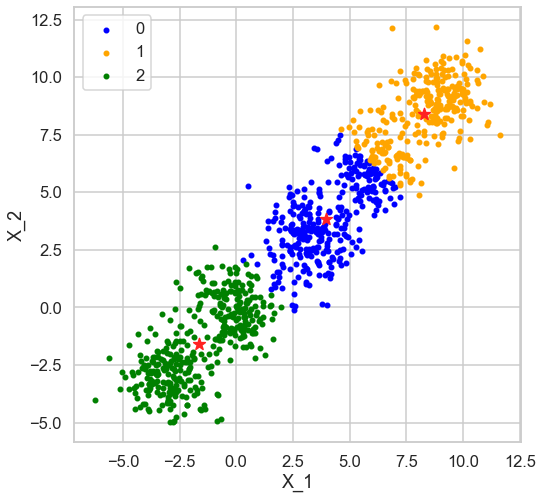

[array([3.96137068, 3.82484137]), array([8.27165521, 8.4262468 ]), array([-1.63024396, -1.56965344])]
0.0
the metric is:  215.9561454910349
the sum is:  215956.1454910349


In [30]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster = GUC_Kmean(3, example2)

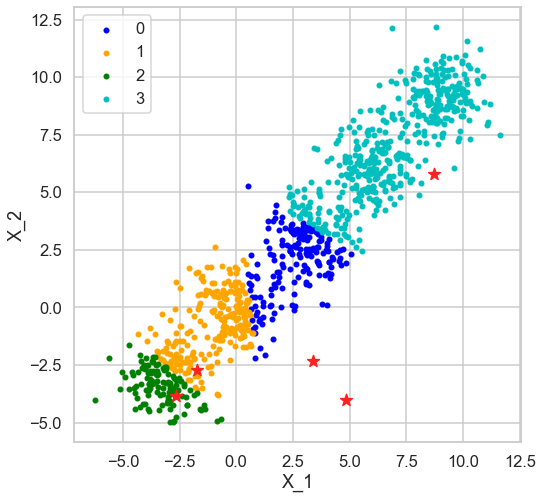

[array([2.53713582, 1.95829521]), array([-1.07998146, -0.74707907]), array([-3.33314994, -3.43042692]), array([6.94744819, 7.08051025]), nan]
nan
the metric is:  449.71837281521044
the sum is:  449718.37281521043


C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [31]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster = GUC_Kmean(5, example2)

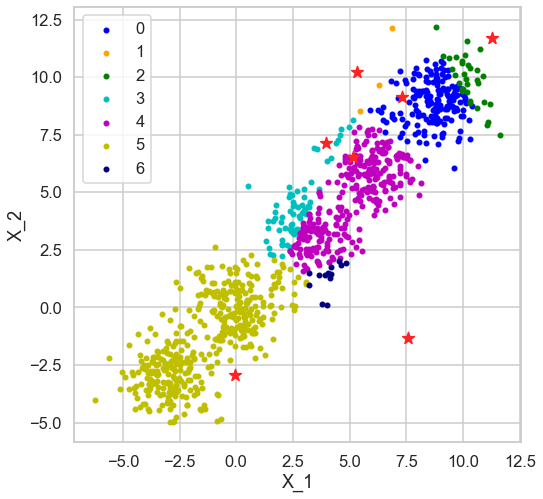

[array([8.65942798, 8.87308706]), array([ 6.20307845, 10.12460771]), array([10.23128452,  9.89599844]), array([2.65906706, 4.33625149]), array([5.08502436, 4.73880767]), array([-1.4201062 , -1.40694731]), array([4.02671927, 1.33538286])]
15.741886392259204
the metric is:  643.5628849316206
the sum is:  643562.8849316206


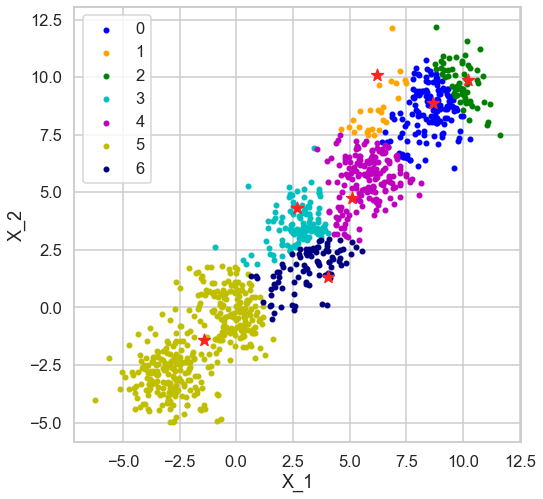

[array([8.50241097, 8.52558717]), array([6.18739115, 8.63799247]), array([9.94805026, 9.74712848]), array([2.67219031, 3.59935238]), array([5.75196923, 5.54727156]), array([-1.71648044, -1.64305492]), array([3.16773417, 1.7014251 ])]
5.285726330705862
the metric is:  545.1131462412651
the sum is:  545113.1462412651


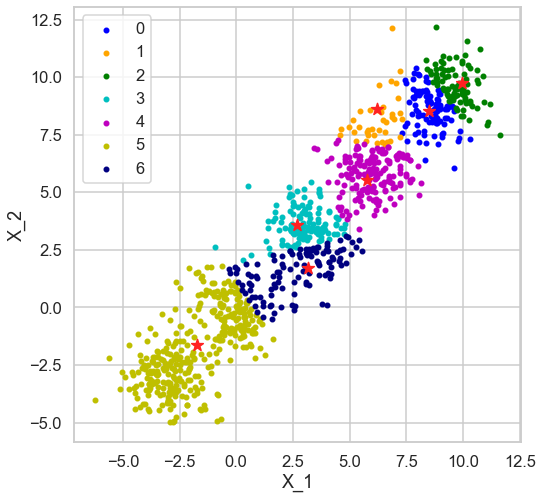

[array([8.58099182, 8.57971794]), array([6.23287467, 8.18741901]), array([9.7064574 , 9.66323766]), array([2.9362262 , 3.63993992]), array([5.9621194 , 5.76331085]), array([-1.84598135, -1.78826688]), array([2.62774126, 1.57477863])]
2.121769238478713
the metric is:  522.5338726887516
the sum is:  522533.8726887516


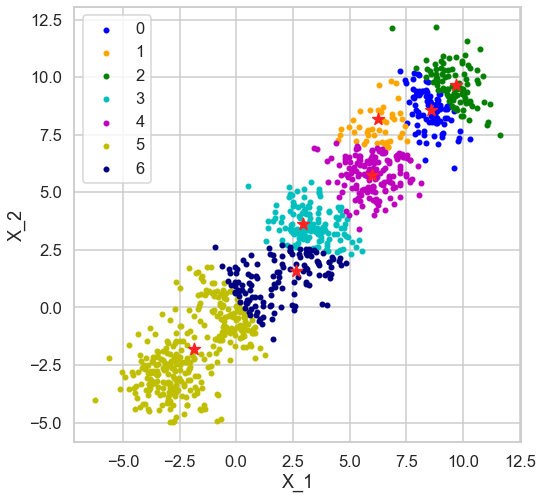

[array([8.57500804, 8.57363064]), array([6.24452427, 7.90514812]), array([9.62299252, 9.66582299]), array([3.29866864, 3.59429756]), array([6.00568871, 5.78056752]), array([-2.00654818, -1.93725532]), array([1.8602749 , 1.23149215])]
1.846504809085157
the metric is:  520.4320379537575
the sum is:  520432.03795375745


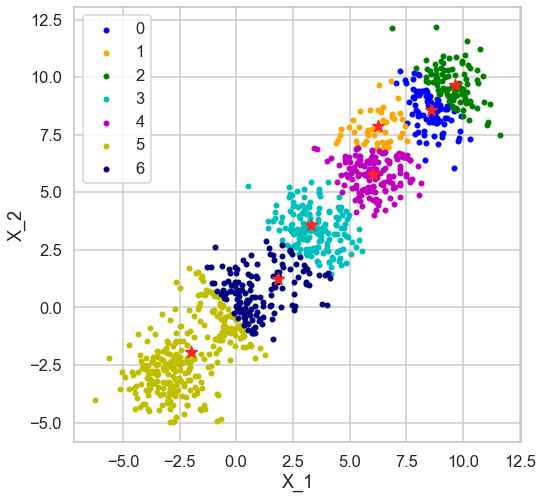

[array([8.56799673, 8.5419555 ]), array([6.15873872, 7.75398669]), array([9.58226336, 9.67498301]), array([3.40978811, 3.39919942]), array([6.0613921, 5.7795084]), array([-2.27970746, -2.20686201]), array([1.00151506, 0.73445388])]
1.9042618108331215
the metric is:  522.2498705423853
the sum is:  522249.8705423853


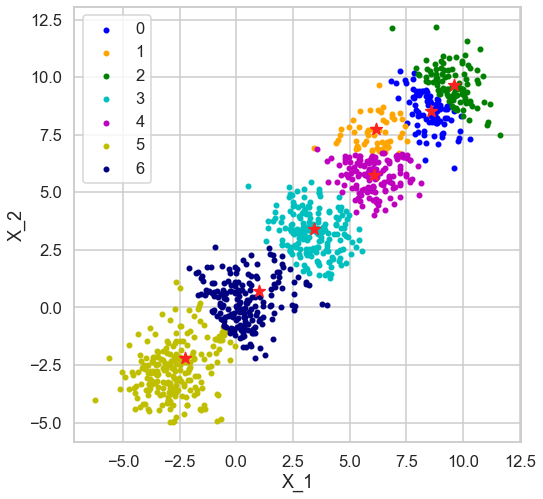

[array([8.54582977, 8.52865641]), array([6.07115761, 7.55800159]), array([9.55150585, 9.68365523]), array([3.36120007, 3.25919729]), array([6.06397853, 5.71701992]), array([-2.76904945, -2.71003229]), array([0.3502163 , 0.27120957])]
1.98432750998509
the metric is:  530.0587770849296
the sum is:  530058.7770849296


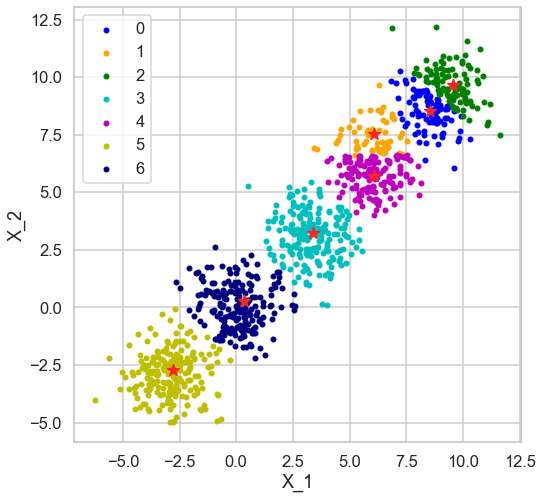

[array([8.51523192, 8.50061205]), array([5.98192011, 7.45261209]), array([9.53453972, 9.68859665]), array([3.28952972, 3.12197235]), array([6.06254067, 5.67344669]), array([-2.93181618, -2.91027192]), array([0.02648628, 0.0699031 ])]
1.034946647299975
the metric is:  543.0340275520086
the sum is:  543034.0275520086


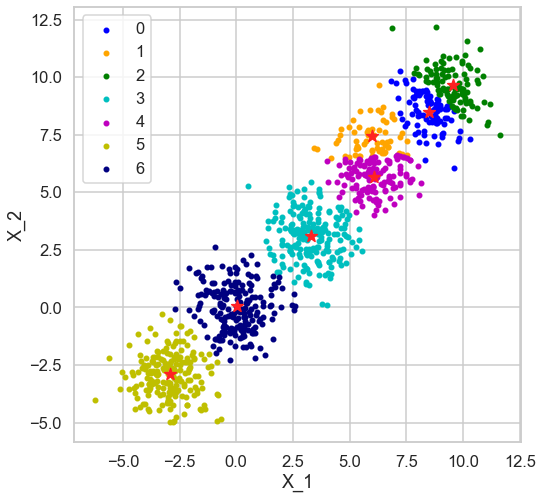

[array([8.50060695, 8.50236992]), array([5.92602554, 7.35669543]), array([9.53827456, 9.67542441]), array([3.27537801, 3.10661444]), array([6.0943991 , 5.62486598]), array([-2.98466663, -2.95177223]), array([-0.02700877,  0.00763433])]
0.36770440047169073
the metric is:  547.7161033423153
the sum is:  547716.1033423153


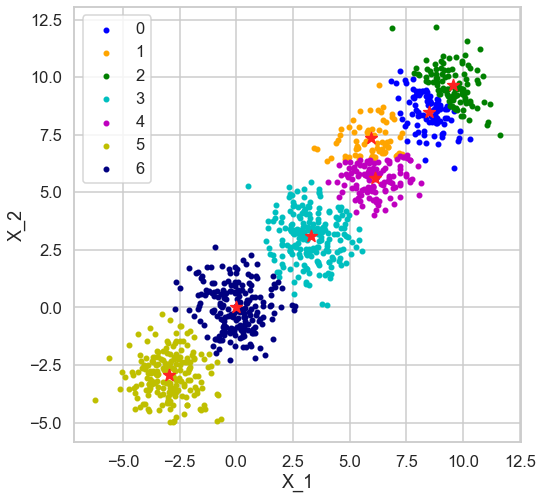

[array([8.48103333, 8.48632846]), array([5.86930162, 7.26117556]), array([9.53703941, 9.66661016]), array([3.26513145, 3.08588165]), array([6.12529797, 5.56802344]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.2577318383234869
the metric is:  548.052711213982
the sum is:  548052.711213982


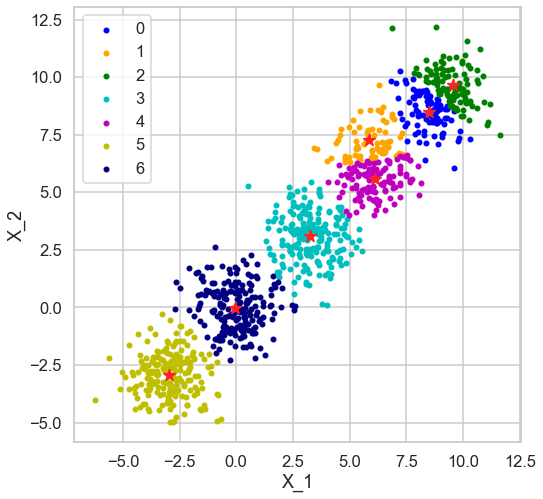

[array([8.48103333, 8.48632846]), array([5.83822985, 7.21288551]), array([9.53703941, 9.66661016]), array([3.2492543 , 3.07583336]), array([6.13270505, 5.51756311]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.12721359493765824
the metric is:  546.4875525563004
the sum is:  546487.5525563004


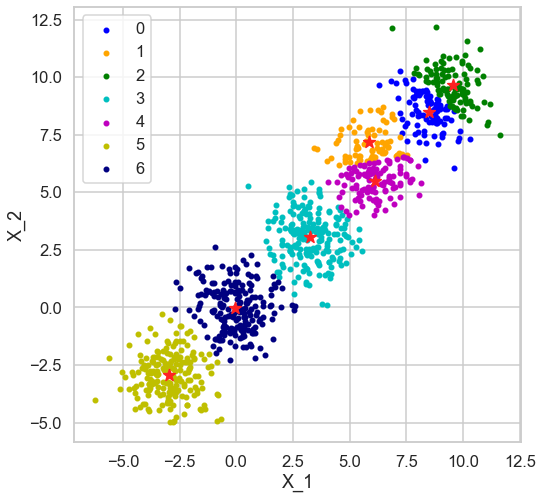

[array([8.44671131, 8.48905019]), array([5.82851708, 7.125252  ]), array([9.53703941, 9.66661016]), array([3.24249526, 3.06940882]), array([6.12238882, 5.46940847]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.18117235716549304
the metric is:  545.695961576803
the sum is:  545695.961576803


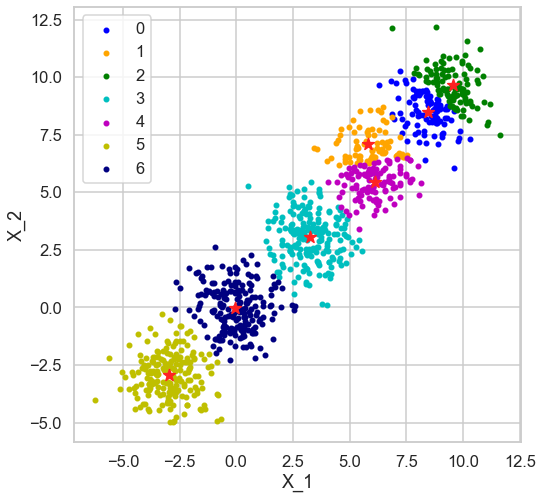

[array([8.41619733, 8.4852962 ]), array([5.83966567, 7.070425  ]), array([9.53703941, 9.66661016]), array([3.23175145, 3.06773617]), array([6.09709923, 5.42512035]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.14856628081505835
the metric is:  544.2760525614764
the sum is:  544276.0525614764


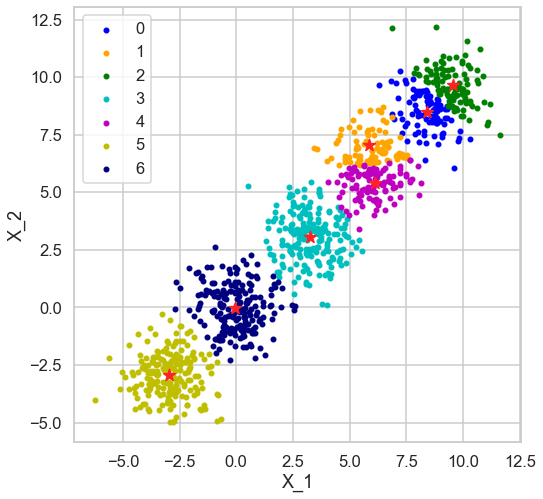

[array([8.39499959, 8.48221303]), array([5.89645614, 7.01297567]), array([9.53548936, 9.64717169]), array([3.23175145, 3.06773617]), array([6.068296  , 5.36365782]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.18957889869747518
the metric is:  543.1534408143718
the sum is:  543153.4408143718


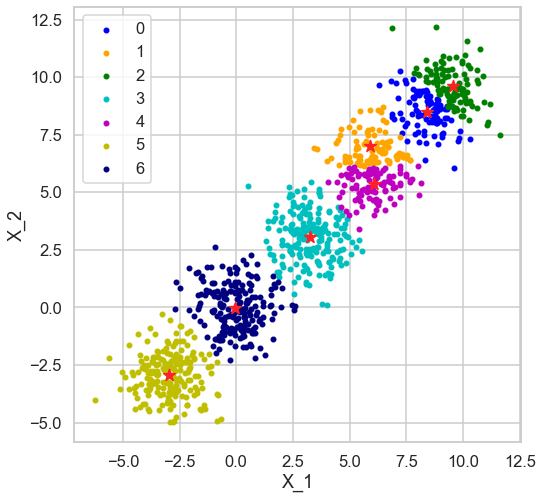

[array([8.36958837, 8.47788903]), array([5.92864575, 6.95892379]), array([9.53364818, 9.6383626 ]), array([3.23175145, 3.06773617]), array([6.03898626, 5.31807164]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.15188237640709695
the metric is:  542.0166186177478
the sum is:  542016.6186177478


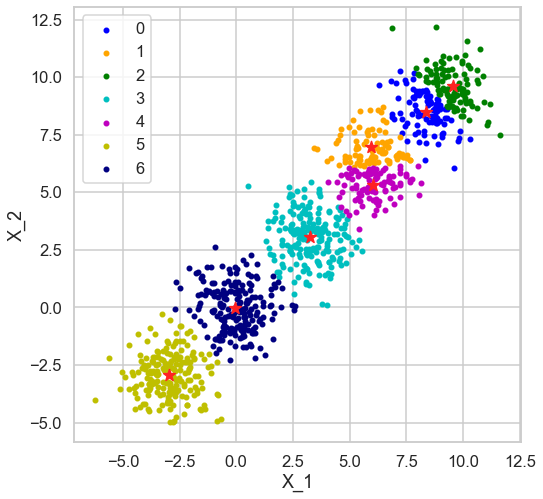

[array([8.35466666, 8.49265009]), array([5.92033547, 6.9493328 ]), array([9.5473148 , 9.62484312]), array([3.23175145, 3.06773617]), array([6.04756622, 5.31046697]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.06436844598175644
the metric is:  540.9332458426057
the sum is:  540933.2458426057


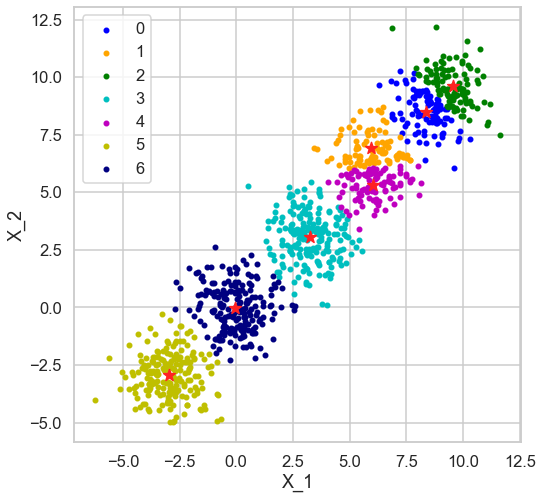

[array([8.35466666, 8.49265009]), array([5.91015984, 6.9396844 ]), array([9.5473148 , 9.62484312]), array([3.23175145, 3.06773617]), array([6.0582001 , 5.30295484]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.02704231639484312
the metric is:  540.8290720488599
the sum is:  540829.0720488599


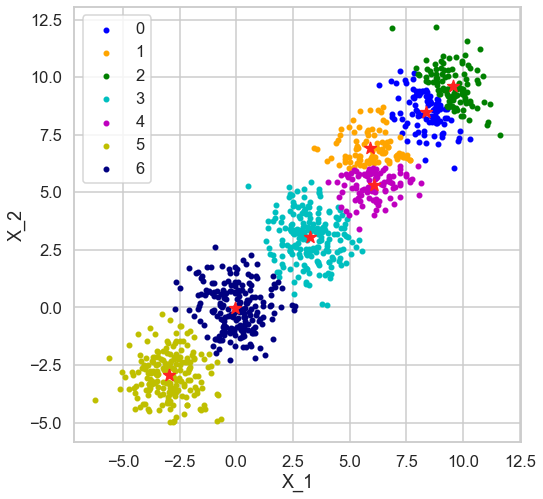

[array([8.35466666, 8.49265009]), array([5.91015984, 6.9396844 ]), array([9.5473148 , 9.62484312]), array([3.23175145, 3.06773617]), array([6.0582001 , 5.30295484]), array([-2.98466663, -2.95177223]), array([-0.0496539 , -0.00199331])]
0.0
the metric is:  540.7258233642704
the sum is:  540725.8233642704


In [32]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster = GUC_Kmean(7, example2)

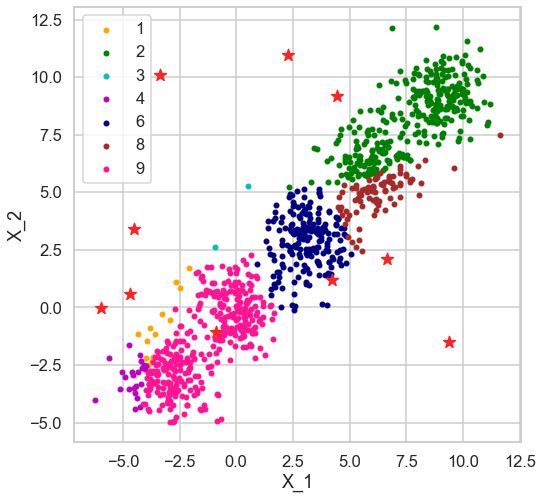

[nan, array([-3.41015765, -0.8491385 ]), array([7.7690896 , 8.19997497]), array([-0.2244023 ,  3.96166232]), array([-4.55250782, -3.05287908]), nan, array([3.08252355, 2.87746499]), nan, array([6.22906746, 4.96633693]), array([-1.37302375, -1.49593742])]
nan
the metric is:  901.4225476340641
the sum is:  901422.5476340641


C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [33]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster = GUC_Kmean(10, example2)

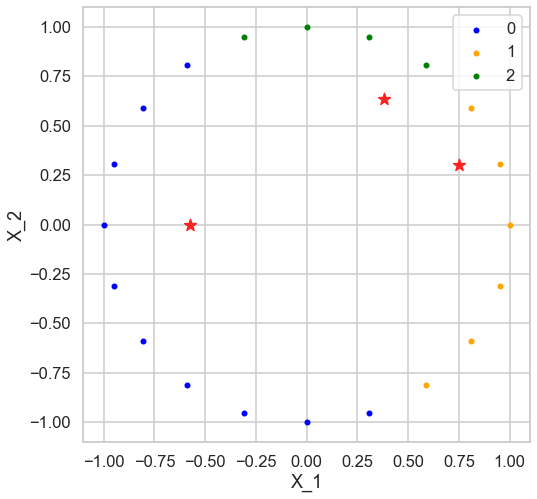

[array([-0.56957175, -0.2902113 ]), array([ 0.85132205, -0.13483617]), array([0.14694631, 0.92778251])]
1.1075991036763349
the metric is:  4.531149756082842
the sum is:  90.62299512165683


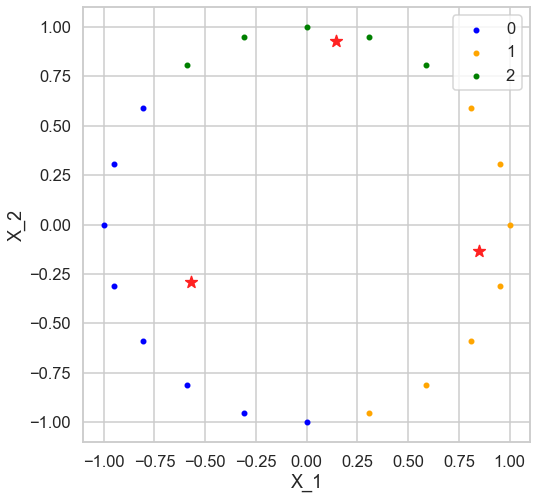

[array([-0.67711866, -0.34500919]), array([ 0.7738499 , -0.25143907]), array([6.66133815e-17, 9.04029404e-01])]
0.4095499017667351
the metric is:  5.033938197553974
the sum is:  100.67876395107947


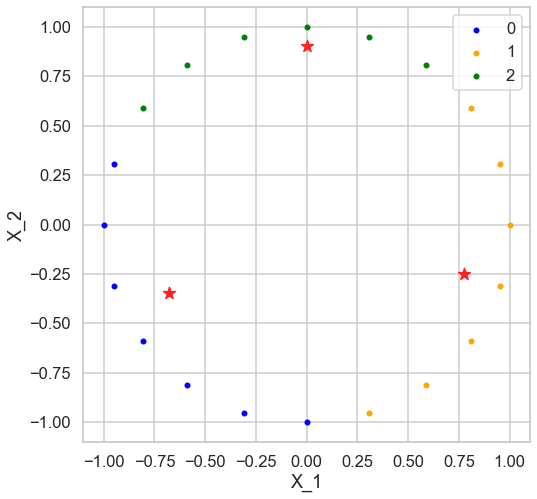

[array([-0.65827604, -0.47826554]), array([ 0.7738499 , -0.25143907]), array([-0.13483617,  0.85132205])]
0.27935368265426386
the metric is:  5.056855449914983
the sum is:  101.13710899829967


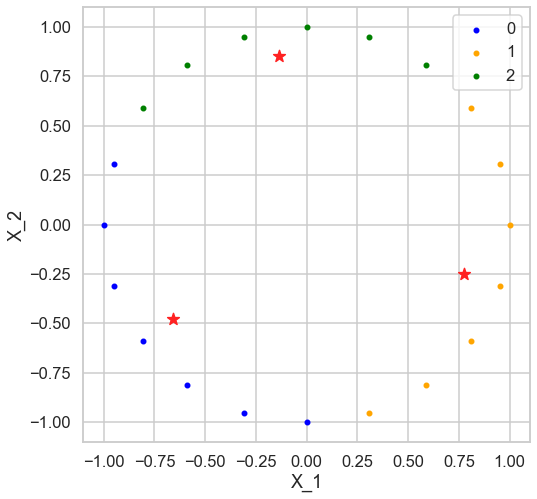

[array([-0.65827604, -0.47826554]), array([ 0.7738499 , -0.25143907]), array([-0.13483617,  0.85132205])]
0.0
the metric is:  5.067060553050171
the sum is:  101.34121106100342


In [34]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
example1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster = GUC_Kmean(3, example1)

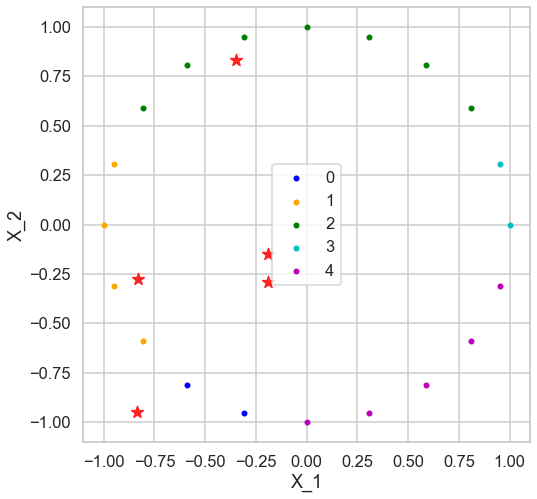

[array([-0.44840112, -0.88003676]), array([-0.92778251, -0.14694631]), array([6.34413157e-17, 8.13673932e-01]), array([0.97552826, 0.1545085 ]), array([ 0.53137515, -0.73137515])]
2.948537412827875
the metric is:  8.353099245304737
the sum is:  167.06198490609472


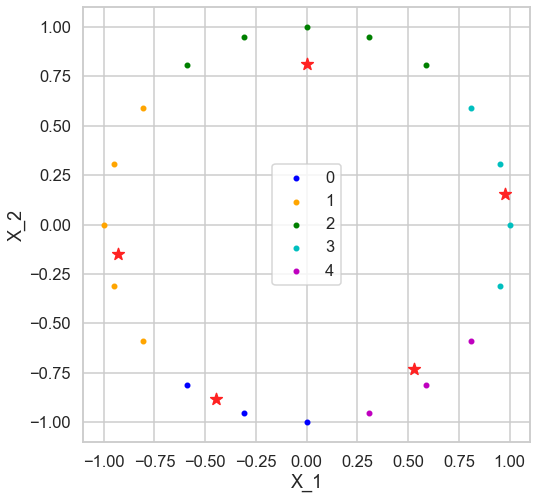

[array([-0.29893408, -0.9200245 ]), array([-9.04029404e-01,  1.11022302e-16]), array([6.66133815e-17, 9.04029404e-01]), array([0.92778251, 0.14694631]), array([ 0.56860641, -0.78261959])]
0.5056153804357889
the metric is:  9.312764546881258
the sum is:  186.25529093762518


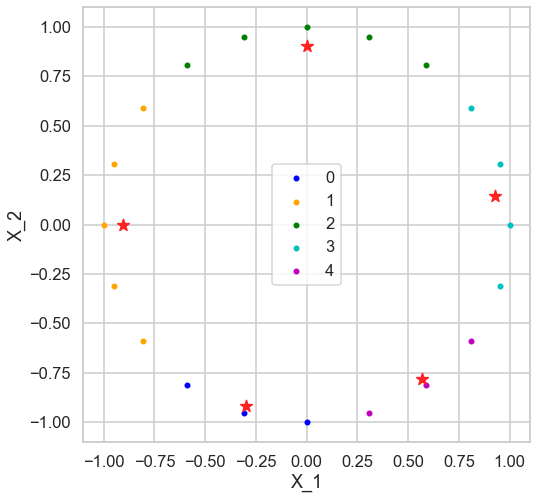

[array([-0.29893408, -0.9200245 ]), array([-9.04029404e-01,  1.11022302e-16]), array([6.66133815e-17, 9.04029404e-01]), array([0.92778251, 0.14694631]), array([ 0.56860641, -0.78261959])]
0.0
the metric is:  9.388525271621324
the sum is:  187.7705054324265


In [35]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
example1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster = GUC_Kmean(5, example1)

In [36]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
example1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


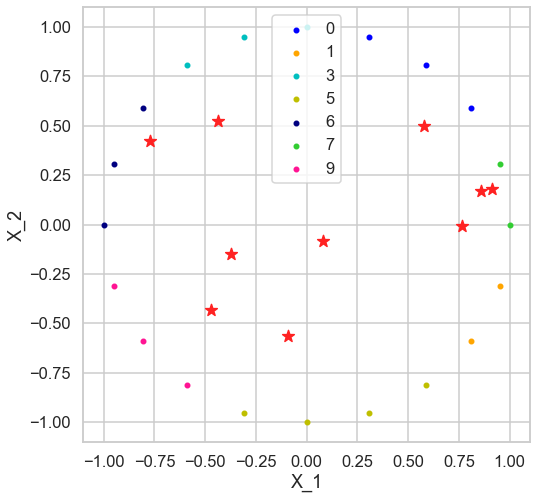

[array([0.56860641, 0.78261959]), array([ 0.88003676, -0.44840112]), nan, array([-0.29893408,  0.9200245 ]), nan, array([ 0.14694631, -0.92778251]), array([-0.9200245 ,  0.29893408]), array([0.97552826, 0.1545085 ]), nan, array([-0.78261959, -0.56860641])]
nan
the metric is:  14.949828770607159
the sum is:  298.99657541214316


In [37]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
example1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster = GUC_Kmean(10, example1)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [38]:
data_arr=data.to_numpy()
print(data_arr)

[[100000001         0         0 ...    124670         1         2]
 [100000002         1         1 ...    150773         1         2]
 [100000003         0         0 ...     89210         0         0]
 ...
 [100001998         0         0 ...     86400         0         0]
 [100001999         1         1 ...     97968         0         0]
 [100002000         0         0 ...     68416         0         0]]


In [39]:
len(data.columns)

8

In [40]:
len(data_arr[0])

8